#Exploratory Data Analysis of AMCAT Data.

##Introduction:

The dataset released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO) provides valuable insights into the employment outcomes of engineering graduates. The study focuses exclusively on students with engineering disciplines, offering a comprehensive view of their career trajectories. With around 40 independent variables and 4000 data points, this dataset serves as a rich resource for analyzing various aspects of employment outcomes among engineering graduates.



##Data Description:

The dataset encompasses several key variables, including demographic features, academic performance, standardized scores in cognitive, technical, and personality skills, as well as employment-related details such as salary, job titles, and job locations. Each data point is uniquely identified by an ID, allowing for precise tracking and analysis.

Variables such as Salary represent the annual CTC (Cost to Company) offered to candidates, while Designation indicates the job title offered. Other categorical variables include JobCity, Gender, Degree, Specialization, and CollegeState, providing insights into the geographical distribution, gender representation, and educational backgrounds of the candidates.

Academic performance metrics such as 10percentage and 12percentage offer a glimpse into the candidates' high school and senior year examination scores, while CollegeGPA reflects their aggregate GPA at graduation. Technical skills are assessed through scores in various engineering sections of the AMCAT (Aspiring Minds Computer Adaptive Test), including Computer Programming, Electronics & Semiconductor Engineering, Computer Science, and more.

Moreover, the dataset includes standardized scores for personality traits such as conscientiousness, agreeableness, extraversion, neuroticism, and openness to experience, derived from one of the sections of AMCAT's personality test. These scores provide valuable insights into the candidates' personality profiles and potential implications for their career success.



##Objective:

The primary objective of analyzing this dataset is to gain insights into the employment outcomes of engineering graduates, exploring factors such as salary determinants, geographical patterns in job distribution, the influence of academic performance and technical skills on career prospects, and potential correlations between personality traits and job success. By examining these factors comprehensively, we aim to uncover trends, identify potential biases, and provide valuable insights for career counselors, recruiters, and policymakers in the engineering education sector.

#Importing the dataset and displaying the head, shape and description of the dataset. (Step-2)

In [ ]:
import pandas as pd # To work with dataframes....
import numpy as np # To work with arrays...
import warnings

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 100)

In [ ]:
amcat_data = pd.read_csv('./dataset/AMCAT_Data.csv')
amcat_data

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,6/1/2012 0:00,present,senior quality engineer,Bangalore,f,2/19/1990 0:00,84.30,"board ofsecondary education,ap",2007,95.80,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,9/1/2013 0:00,present,assistant manager,Indore,m,10/4/1989 0:00,85.40,cbse,2007,85.00,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,6/1/2014 0:00,present,systems engineer,Chennai,f,8/3/1992 0:00,85.00,cbse,2010,68.20,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,7/1/2011 0:00,present,senior software engineer,Gurgaon,m,12/5/1989 0:00,85.60,cbse,2007,83.60,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,3/1/2014 0:00,3/1/2015 0:00,get,Manesar,m,2/27/1991 0:00,78.00,cbse,2008,76.80,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000,10/1/2011 0:00,10/1/2012 0:00,software engineer,New Delhi,m,4/15/1987 0:00,52.09,cbse,2006,55.50,cbse,6268,2,B.Tech/B.E.,information technology,61.50,6268,0,Haryana,2010,365,334,475,0.276047,345,-1,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000,7/1/2013 0:00,7/1/2013 0:00,technical writer,Hyderabad,f,8/27/1992 0:00,90.00,state board,2009,93.00,state board,4883,2,B.Tech/B.E.,electronics and communication engineering,77.30,4883,1,Telangana,2013,415,410,535,0.881620,325,420,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000,7/1/2013 0:00,present,associate software engineer,Bangalore,m,7/3/1991 0:00,81.86,"bse,odisha",2008,65.50,"chse,odisha",9786,2,B.Tech/B.E.,computer engineering,70.00,9786,0,Orissa,2012,475,475,465,0.488348,405,-1,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000,7/1/2014 0:00,1/1/2015 0:00,software developer,Asifabadbanglore,f,3/20/1992 0:00,78.72,state board,2010,69.88,state board,979,2,B.Tech/B.E.,computer science & engineering,70.42,979,1,Karnataka,2014,450,410,320,0.744758,445,-1,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [ ]:
# Making a copy of the data...
amcat_data2 = amcat_data.copy(deep=True)
amcat_data2.head(5)

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,6/1/2012 0:00,present,senior quality engineer,Bangalore,f,2/19/1990 0:00,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,9/1/2013 0:00,present,assistant manager,Indore,m,10/4/1989 0:00,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,6/1/2014 0:00,present,systems engineer,Chennai,f,8/3/1992 0:00,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,7/1/2011 0:00,present,senior software engineer,Gurgaon,m,12/5/1989 0:00,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,3/1/2014 0:00,3/1/2015 0:00,get,Manesar,m,2/27/1991 0:00,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [ ]:
amcat_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   int64  
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [ ]:
amcat_data2.shape

(3998, 39)

In [ ]:
amcat_data2.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [ ]:
amcat_data2.duplicated().sum()

0

In [ ]:
amcat_data2.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [ ]:
amcat_data2.nunique()

Unnamed: 0                  1
ID                       3998
Salary                    177
DOJ                        81
DOL                        67
Designation               419
JobCity                   339
Gender                      2
DOB                      1872
10percentage              851
10board                   275
12graduation               16
12percentage              801
12board                   340
CollegeID                1350
CollegeTier                 2
Degree                      4
Specialization             46
collegeGPA               1282
CollegeCityID            1350
CollegeCityTier             2
CollegeState               26
GraduationYear             11
English                   111
Logical                   107
Quant                     138
Domain                    243
ComputerProgramming        79
ElectronicsAndSemicon      29
ComputerScience            20
MechanicalEngg             42
ElectricalEngg             31
TelecomEngg                26
CivilEngg 

In [ ]:
# Dropping the 'Unnamed: 0', 'ID','CollegeID','CollegeCityID' columns from the data..
amcat_data2 = amcat_data2.drop(columns = ['Unnamed: 0', 'ID','CollegeID','CollegeCityID'])
amcat_data2.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,6/1/2012 0:00,present,senior quality engineer,Bangalore,f,2/19/1990 0:00,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,9/1/2013 0:00,present,assistant manager,Indore,m,10/4/1989 0:00,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,6/1/2014 0:00,present,systems engineer,Chennai,f,8/3/1992 0:00,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,7/1/2011 0:00,present,senior software engineer,Gurgaon,m,12/5/1989 0:00,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,3/1/2014 0:00,3/1/2015 0:00,get,Manesar,m,2/27/1991 0:00,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


##Converting the Type of Data

1) **DOL -- Date of Leaving**

In 2015, a survey was conducted, and for the column `Date of Leaving (DOL)`, some respondents marked their status as `present`, indicating they were still with their respective companies. Assuming these respondents left their companies by the time of the survey's conclusion in 2015, we'll replace the 'present' value with `2024-02-22`, which is the current date.

After this adjustment, we'll convert the data types of the `Date of Joining (DOJ)` and `Date of Leaving (DOL)` columns to datetime format for consistency and ease of analysis.

In [ ]:
amcat_data2['DOJ'] = pd.to_datetime(amcat_data2['DOJ'])
def handle_present_date(date_str):
    if date_str == "present":
        return pd.to_datetime("today")
    else:
        return pd.to_datetime(date_str)
amcat_data2['DOL'].replace('present','2015-12-31', inplace = True)
amcat_data2["DOL"] = amcat_data2["DOL"].apply(handle_present_date)
amcat_data2['DOL'] = pd.to_datetime(amcat_data2['DOL'])
amcat_data2.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,2/19/1990 0:00,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,m,10/4/1989 0:00,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,f,8/3/1992 0:00,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,12/5/1989 0:00,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,m,2/27/1991 0:00,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


**Converting every categorical columns in the data to `category` datatypes**

In [ ]:
# Assume the categorical columns in the given data...
categorical_cols = ['Designation','JobCity', 'Gender','10board','12board','CollegeTier','Degree','Specialization','CollegeCityTier','CollegeState']

# Convert every categorical column to 'category' data type...
for category in categorical_cols:
  amcat_data2[category] = amcat_data2[category].astype('category')

In [ ]:
amcat_data2[categorical_cols].dtypes
# Done converting every column that needs to be categorical to as category datatype...

Designation        category
JobCity            category
Gender             category
10board            category
12board            category
CollegeTier        category
Degree             category
Specialization     category
CollegeCityTier    category
CollegeState       category
dtype: object

2) **We can check that the `DOL`(Date of Leaving) is earlier than `DOJ`(Date of Joining).**

In [ ]:
# Getting the number of date of leaving values that were earlier than the Date of Joining (DOJ) values...
dol_doj_dates = amcat_data2[(amcat_data2['DOL'] < amcat_data2['DOJ'])].shape[0]
print(f'Therefore there were {dol_doj_dates} DOL values that were earlier than DOJ.')

Therefore there were 40 DOL values that were earlier than DOJ.


- **Here we say that `40` out of `3998` were left the company before joining the company. So these values might to be typos, then we drop those rows.**

In [ ]:
amcat_data2 = amcat_data2.drop(amcat_data2[~(amcat_data2['DOL'] > amcat_data2['DOJ'])].index)
amcat_data2.shape # Shape of the data after dropping those 40 rows...

(3943, 35)

3) **Converting every entries in the `Gender` column more descriptive.**

In [ ]:
amcat_data2['Gender'].replace({'f':'Female', 'm':'Male'}, inplace=True)
amcat_data2['Gender'].head()

0    Female
1      Male
2    Female
3      Male
4      Male
Name: Gender, dtype: category
Categories (2, object): ['Female', 'Male']

4) **Validating the results that they were in percentage(s) and not in CollegeGPA or otherwise**

In [ ]:
print((amcat_data2['10percentage'] <=10 ).sum())
print((amcat_data2['12percentage'] <=10 ).sum())
print((amcat_data2['collegeGPA'] <=10 ).sum())

0
0
12


- **We've to look at `collegeGPA` column where we've `12` rows which needs to be treated.**

In [ ]:
# Subsetting the 'collegeGPA' column less than 10 and getting their index..
amcat_data2.loc[amcat_data2['collegeGPA']<=10, 'collegeGPA'].index

Index([7, 138, 788, 1419, 1439, 1767, 2151, 2229, 2293, 2662, 2691, 3308], dtype='int64')

In [ ]:
amcat_data2.loc[amcat_data2['collegeGPA']<=10, 'collegeGPA'] = (amcat_data2.loc[amcat_data2['collegeGPA']<=10, 'collegeGPA'] / 10) * 100

In [ ]:
amcat_data2['collegeGPA'].head()

0    78.00
1    70.06
2    70.00
3    74.64
4    73.90
Name: collegeGPA, dtype: float64

5) **Checking whether 0 or -1 in the data, if exist then we've to impute.**

In [ ]:
print((amcat_data2==0).sum()[(amcat_data2==0).sum() > 0])

CollegeCityTier    2761
GraduationYear        1
dtype: int64


In [ ]:
(amcat_data2==-1).sum()[(amcat_data2==-1).sum() > 0] / len(amcat_data2) * 100

Domain                    6.137459
ComputerProgramming      21.836165
ElectronicsAndSemicon    71.392341
ComputerScience          77.605884
MechanicalEngg           94.040071
ElectricalEngg           96.094344
TelecomEngg              90.565559
CivilEngg                98.934821
dtype: float64


**Certain columns in the dataset have values of 0 or -1, which are not valid inputs according to the column descriptions. Therefore, we consider these values as null and will replace them with appropriate values.**

For columns such as 'Electronics', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', and 'TelecomEngg', 'CivilEngg', any occurrences of 0 or -1 will be treated as null values and replaced accordingly.

Additionally, some columns describe optional subjects for exams, resulting in a large number of -1 values (indicating null). If the percentage of -1 values in these columns is 80% or more, we'll drop these columns from the analysis altogether. For the remaining columns, we'll impute the -1 values with zeros.


| Sr.No. | Column Name              | Presence of Nullity Score      |
|------|---------------------|------------|
| 1    | ElectronicsAndSemicon | 71.392341 |
| 2    | ComputerScience       | 77.605884 |
| 3    | MechanicalEngg        | 94.040071 |
| 4    | ElectricalEngg        | 96.094344 |
| 5    | TelecomEngg           | 90.565559 |
| 6    | CivilEngg             | 98.934821 |          

In [ ]:
# Dropping 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg' columns from the data...
amcat_data2 = amcat_data2.drop(columns = ['MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg'])
amcat_data2.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,Female,2/19/1990 0:00,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,Male,10/4/1989 0:00,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,Female,8/3/1992 0:00,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,Male,12/5/1989 0:00,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,Male,2/27/1991 0:00,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [ ]:
# Converting the '10board', '12board', 'JobCity' to string datatype...
amcat_data2['10board'] = amcat_data2['10board'].astype(str)
amcat_data2['12board'] = amcat_data2['12board'].astype(str)
amcat_data2['JobCity'] = amcat_data2['JobCity'].astype(str)
# Check whether if its converted to string/object datatype...
amcat_data2[['10board', '12board', 'JobCity']].dtypes

10board    object
12board    object
JobCity    object
dtype: object

In [ ]:
# Replacing the 0 and -1 as nan values...
amcat_data2['10board'] = amcat_data2['10board'].replace({'0': np.nan})
amcat_data2['12board'] = amcat_data2['12board'].replace({'0': np.nan})
amcat_data2['GraduationYear'] = amcat_data2['GraduationYear'].replace({0:np.nan})
amcat_data2['JobCity'] = amcat_data2['JobCity'].replace({'-1':np.nan})
amcat_data2['Domain'] = amcat_data2['Domain'].replace({-1:np.nan})
amcat_data2['ElectronicsAndSemicon'] = amcat_data2['ElectronicsAndSemicon'].replace({-1:0})
amcat_data2['ComputerScience'] = amcat_data2['ComputerScience'].replace({-1:0})
amcat_data2['ComputerProgramming'] = amcat_data2['ComputerProgramming'].replace({-1:np.nan})

In [ ]:
# Converting the '10board', '12board', 'JobCity' to category datatype...
amcat_data2['10board'] = amcat_data2['10board'].astype('category')
amcat_data2['12board'] = amcat_data2['12board'].astype('category')
amcat_data2['JobCity'] = amcat_data2['JobCity'].astype('category')
# Check whether if its converted to category datatype...
amcat_data2[['10board', '12board', 'JobCity']].dtypes

10board    category
12board    category
JobCity    category
dtype: object

In [ ]:
amcat_data2.head(10)

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,Female,2/19/1990 0:00,84.30,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011.0,515,585,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,Male,10/4/1989 0:00,85.40,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012.0,695,610,780,0.960603,NaN,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,Female,8/3/1992 0:00,85.00,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014.0,615,545,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,Male,12/5/1989 0:00,85.60,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011.0,635,585,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,Male,2/27/1991 0:00,78.00,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012.0,545,625,465,0.124502,NaN,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
5,300000,2014-06-01,2015-12-31,system engineer,Hyderabad,Male,7/2/1992 0:00,89.92,state board,2010,87.0,state board,2,B.Tech/B.E.,electronics and communication engineering,76.32,0,Karnataka,2014.0,560,555,620,NaN,645.0,0,407,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608
6,300000,2014-08-01,2015-05-01,java software engineer,Banglore,Male,2/1/1993 0:00,86.08,state board,2010,67.5,state board,2,B.Tech/B.E.,computer science & engineering,72.98,1,Karnataka,2014.0,590,435,380,0.356536,405.0,0,346,1.7081,-0.1054,-1.0379,-2.00920,-1.0872
7,400000,2014-07-01,2015-07-01,mechanical engineer,Bangalore,Male,5/27/1992 0:00,92.00,cbse,2010,91.0,cbse,1,B.Tech/B.E.,mechanical engineering,85.80,0,Tamil Nadu,2016.0,545,555,590,0.829585,NaN,0,0,-0.0154,1.2114,0.0100,0.14590,1.2470
8,600000,2013-07-01,2015-12-31,electrical engineer,Noida,Male,9/17/1991 0:00,90.00,cbse,2009,91.2,cbse,1,B.Tech/B.E.,electronics and electrical engineering,85.03,1,Delhi,2013.0,615,670,530,0.694479,735.0,366,0,-0.1590,0.5454,-0.6048,-0.74150,-0.2859
9,230000,2014-07-01,2015-12-31,project engineer,Kolkata,Male,6/13/1993 0:00,77.00,cbse,2010,72.2,cbse,2,B.Tech/B.E.,electronics and communication engineering,78.00,1,West Bengal,2014.0,605,565,545,0.493596,385.0,324,0,-1.3080,0.5454,-0.9122,0.90660,0.0973


**We impute categorical columns with their mode values.**

In [ ]:
amcat_data2['10board'].fillna(amcat_data2['10board'].mode()[0], inplace = True)
amcat_data2['12board'].fillna(amcat_data2['12board'].mode()[0], inplace = True)
amcat_data2['GraduationYear'].fillna(amcat_data2['GraduationYear'].mode()[0], inplace = True)
amcat_data2['JobCity'].fillna(amcat_data2['JobCity'].mode()[0], inplace = True)

amcat_data2

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,Female,2/19/1990 0:00,84.30,"board ofsecondary education,ap",2007,95.80,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011.0,515,585,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,Male,10/4/1989 0:00,85.40,cbse,2007,85.00,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012.0,695,610,780,0.960603,NaN,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,Female,8/3/1992 0:00,85.00,cbse,2010,68.20,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014.0,615,545,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,Male,12/5/1989 0:00,85.60,cbse,2007,83.60,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011.0,635,585,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,Male,2/27/1991 0:00,78.00,cbse,2008,76.80,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012.0,545,625,465,0.124502,NaN,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,800000,2014-04-01,2015-04-01,manager,Rajkot,Male,6/22/1990 0:00,73.00,cbse,2008,54.00,cbse,2,B.Tech/B.E.,civil engineering,79.00,0,Orissa,2012.0,405,345,525,0.938588,NaN,0,0,0.3555,-0.9033,0.9623,0.64983,-0.4229
3993,280000,2011-10-01,2012-10-01,software engineer,New Delhi,Male,4/15/1987 0:00,52.09,cbse,2006,55.50,cbse,2,B.Tech/B.E.,information technology,61.50,0,Haryana,2010.0,365,334,475,0.276047,345.0,0,0,-0.1082,0.3448,0.2366,0.64980,-0.9194
3995,320000,2013-07-01,2015-12-31,associate software engineer,Bangalore,Male,7/3/1991 0:00,81.86,"bse,odisha",2008,65.50,"chse,odisha",2,B.Tech/B.E.,computer engineering,70.00,0,Orissa,2012.0,475,475,465,0.488348,405.0,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,200000,2014-07-01,2015-01-01,software developer,Asifabadbanglore,Female,3/20/1992 0:00,78.72,state board,2010,69.88,state board,2,B.Tech/B.E.,computer science & engineering,70.42,1,Karnataka,2014.0,450,410,320,0.744758,445.0,0,438,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


**We impute numerical columns with their median values.**

In [ ]:
amcat_data2['Domain'].fillna(amcat_data2['Domain'].median(), inplace=True)
amcat_data2['ComputerProgramming'].fillna(amcat_data2['ComputerProgramming'].median(), inplace=True)
amcat_data2.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,Female,2/19/1990 0:00,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011.0,515,585,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,Male,10/4/1989 0:00,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012.0,695,610,780,0.960603,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,Female,8/3/1992 0:00,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014.0,615,545,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,Male,12/5/1989 0:00,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011.0,635,585,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,Male,2/27/1991 0:00,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012.0,545,625,465,0.124502,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


**Checking for any missing values.**

In [ ]:
amcat_data2.isnull().sum()

Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
dtype: int64

6) **Fixing the string values in the columns of the dataset.**

In [ ]:
def fix_str_values(col_name):
  amcat_data2[col_name] = amcat_data2[col_name].str.lower().str.strip() # Convert the categorical text to lower letters and strip any space if present.

In [ ]:
string_columns = ['Designation','JobCity','10board','12board','Specialization','CollegeState']

for string_column in string_columns:
  print(f'No. of unique strings in {string_column} with some inconsistencies: {amcat_data2[string_column].nunique()}')


No. of unique strings in Designation with some inconsistencies: 416
No. of unique strings in JobCity with some inconsistencies: 337
No. of unique strings in 10board with some inconsistencies: 274
No. of unique strings in 12board with some inconsistencies: 339
No. of unique strings in Specialization with some inconsistencies: 46
No. of unique strings in CollegeState with some inconsistencies: 26


In [ ]:
amcat_data2['Designation'].str.lower().str.strip()

0           senior quality engineer
1                 assistant manager
2                  systems engineer
3          senior software engineer
4                               get
                   ...             
3992                        manager
3993              software engineer
3995    associate software engineer
3996             software developer
3997        senior systems engineer
Name: Designation, Length: 3943, dtype: object

In [ ]:
# Fixing those inconsistencies...
for string_column in string_columns: fix_str_values(string_column)

In [ ]:
for string_column in string_columns:
    print(f'No. of unique strings in {string_column} without inconsistencies: {amcat_data2[string_column].nunique()}')

No. of unique strings in Designation without inconsistencies: 416
No. of unique strings in JobCity without inconsistencies: 230
No. of unique strings in 10board without inconsistencies: 272
No. of unique strings in 12board without inconsistencies: 336
No. of unique strings in Specialization without inconsistencies: 46
No. of unique strings in CollegeState without inconsistencies: 26


##Categories collapsion:

**We will retain only the top 10 most frequently occurring categories in each column, while grouping all other categories into a single category labeled as "Other".**

In [ ]:
def categories_collapsion(dataframe, column):
  for Designation in dataframe[column].unique():
    min_count = dataframe[column].value_counts()[:10].min()
    if dataframe[dataframe[column] == Designation][column].value_counts()[0] < min_count:
      dataframe.loc[dataframe[column] == Designation, data] = 'other'

In [ ]:
for string_column in string_columns:
  print(f'\n Top ten categories in {string_column}\n ')
  print(f'{amcat_data2[string_column].value_counts()}\n ')
  print('_'*100)


 Top ten categories in Designation
 
Designation
software engineer                    535
software developer                   262
system engineer                      202
programmer analyst                   139
systems engineer                     117
                                    ... 
human resources intern                 1
senior quality assurance engineer      1
clerical assistant                     1
delivery software engineer             1
jr. software developer                 1
Name: count, Length: 416, dtype: int64
 
____________________________________________________________________________________________________

 Top ten categories in JobCity
 
JobCity
bangalore           1109
noida                382
hyderabad            361
pune                 322
chennai              310
                    ... 
dharmapuri             1
vandavasi              1
rohtak                 1
una                    1
asifabadbanglore       1
Name: count, Length: 230, dtype: int64
 

In [ ]:
amcat_data2.head(10)

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,bangalore,Female,2/19/1990 0:00,84.30,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,andhra pradesh,2011.0,515,585,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,indore,Male,10/4/1989 0:00,85.40,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,madhya pradesh,2012.0,695,610,780,0.960603,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,chennai,Female,8/3/1992 0:00,85.00,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,uttar pradesh,2014.0,615,545,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,gurgaon,Male,12/5/1989 0:00,85.60,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,delhi,2011.0,635,585,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,manesar,Male,2/27/1991 0:00,78.00,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,uttar pradesh,2012.0,545,625,465,0.124502,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
5,300000,2014-06-01,2015-12-31,system engineer,hyderabad,Male,7/2/1992 0:00,89.92,state board,2010,87.0,state board,2,B.Tech/B.E.,electronics and communication engineering,76.32,0,karnataka,2014.0,560,555,620,0.649390,645.0,0,407,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608
6,300000,2014-08-01,2015-05-01,java software engineer,banglore,Male,2/1/1993 0:00,86.08,state board,2010,67.5,state board,2,B.Tech/B.E.,computer science & engineering,72.98,1,karnataka,2014.0,590,435,380,0.356536,405.0,0,346,1.7081,-0.1054,-1.0379,-2.00920,-1.0872
7,400000,2014-07-01,2015-07-01,mechanical engineer,bangalore,Male,5/27/1992 0:00,92.00,cbse,2010,91.0,cbse,1,B.Tech/B.E.,mechanical engineering,85.80,0,tamil nadu,2016.0,545,555,590,0.829585,455.0,0,0,-0.0154,1.2114,0.0100,0.14590,1.2470
8,600000,2013-07-01,2015-12-31,electrical engineer,noida,Male,9/17/1991 0:00,90.00,cbse,2009,91.2,cbse,1,B.Tech/B.E.,electronics and electrical engineering,85.03,1,delhi,2013.0,615,670,530,0.694479,735.0,366,0,-0.1590,0.5454,-0.6048,-0.74150,-0.2859
9,230000,2014-07-01,2015-12-31,project engineer,kolkata,Male,6/13/1993 0:00,77.00,cbse,2010,72.2,cbse,2,B.Tech/B.E.,electronics and communication engineering,78.00,1,west bengal,2014.0,605,565,545,0.493596,385.0,324,0,-1.3080,0.5454,-0.9122,0.90660,0.0973


##Feature Engineering:

1) **We'll calculate the age of each individual in the dataset by subtracting their year of birth (DOB) from the year 2015, as the dataset was released in 2015. This calculation will provide the age of each individual as of 2015.**

In [ ]:
amcat_data2['DOB'] = pd.to_datetime(amcat_data2['DOB'])
amcat_data2['Age'] = 2015 - amcat_data2['DOB'].dt.year
amcat_data2.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age
0,420000,2012-06-01,2015-12-31,senior quality engineer,bangalore,Female,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,andhra pradesh,2011.0,515,585,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,25
1,500000,2013-09-01,2015-12-31,assistant manager,indore,Male,1989-10-04,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,madhya pradesh,2012.0,695,610,780,0.960603,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,26
2,325000,2014-06-01,2015-12-31,systems engineer,chennai,Female,1992-08-03,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,uttar pradesh,2014.0,615,545,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,23
3,1100000,2011-07-01,2015-12-31,senior software engineer,gurgaon,Male,1989-12-05,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,delhi,2011.0,635,585,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,26
4,200000,2014-03-01,2015-03-01,get,manesar,Male,1991-02-27,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,uttar pradesh,2012.0,545,625,465,0.124502,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,24


2) **Add tenure column by subtracting the `DOL`(Date of Leaving) from `DOJ`(Date of Joining).**

In [ ]:
# Subtracting the DOL(Date of Leaving) from DOJ(Date of Joining)
delta = (amcat_data2['DOL'] - amcat_data2['DOJ'])

tenure = np.zeros(len(amcat_data2))

for i, date in enumerate(delta):
  tenure[i] = round(date.days/365, 2)

amcat_data2['Tenure'] = tenure
amcat_data2['Tenure']

0       3.58
1       2.33
2       1.58
3       4.50
4       1.00
        ... 
3992    1.00
3993    1.00
3995    2.50
3996    0.50
3997    2.91
Name: Tenure, Length: 3943, dtype: float64

3) **We'll remove any rows where the graduation year of a candidate is greater than or equal to their date of joining a job.**

In [ ]:
print(f"No of graduation year of a candidate greater than or equal to their date of joining a job: {len(amcat_data2[(amcat_data2['GraduationYear'] > amcat_data2['DOJ'].dt.year)].index)}")

No of graduation year of a candidate greater than or equal to their date of joining a job: 79


In [ ]:
# Dropping those candiates whose graduation year >= date of joining (DOJ) a job...
amcat_data2 = amcat_data2.drop(amcat_data2[(amcat_data2['GraduationYear'] > amcat_data2['DOJ'].dt.year)].index)
amcat_data2.shape

(3864, 33)

4) **Creating a function to compute CDF.**

In [ ]:
def CDF(data):
  x = np.sort(data)
  y = np.arange(1, len(x) + 1) / len(x)
  return x, y

#Univariate Analysis (Step-3)

##1) **Continuous Feature Analysis**

In [ ]:
# Import necessary libraries..
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

## 1.1 **Tenure**

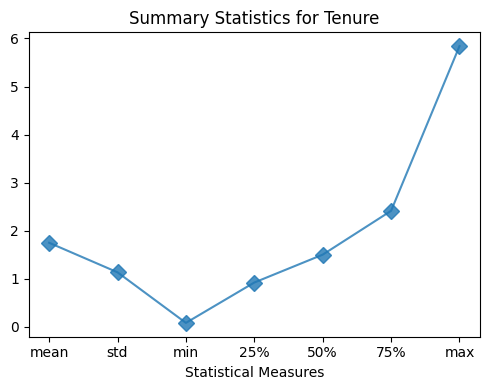

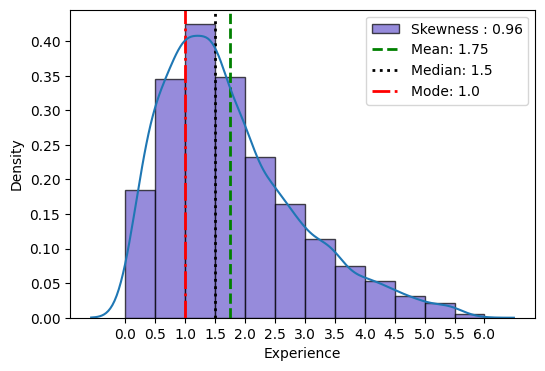

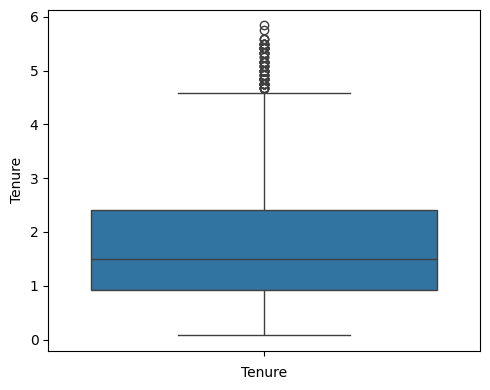

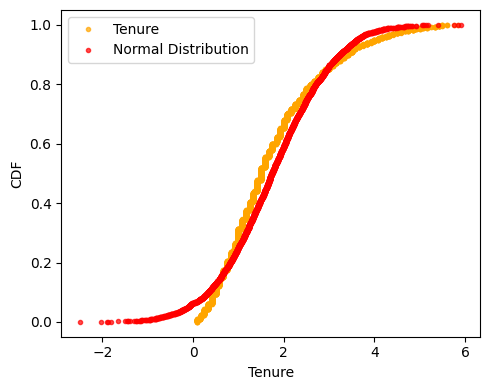

In [ ]:
# Summary Plot

plt.figure(figsize=(5, 4))
amcat_data2['Tenure'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Tenure')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

plt.figure(figsize = (6,4))
plt.hist(amcat_data2['Tenure'],
        ec = 'k',
        bins = np.arange(0, amcat_data2['Tenure'].max()+0.5, 0.5),
        color = 'slateblue',
        alpha = 0.7,
        label = f"Skewness : {round(amcat_data2['Tenure'].skew(),2)}",
        density = True)
plt.xticks(ticks = np.arange(0, amcat_data2['Tenure'].max()+0.5, 0.5))
plt.xlabel('Experience')
plt.ylabel('Density')
plt.axvline(amcat_data2['Tenure'].mean(), label = f"Mean: {round(amcat_data2['Tenure'].mean(),2)}",
            linestyle = '--',
           color = 'green', linewidth = 2)
plt.axvline(amcat_data2['Tenure'].median(), label = f"Median: {round(amcat_data2['Tenure'].median(),2)}",
            linestyle = ':',
           color = 'k', linewidth = 2)
plt.axvline(amcat_data2['Tenure'].mode()[0], label = f"Mode: {round(amcat_data2['Tenure'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
sns.kdeplot(amcat_data2['Tenure'])
plt.legend()
plt.show()

# Box Plot

plt.figure(figsize=(5, 4))
sns.boxplot(amcat_data2['Tenure'])
plt.xlabel('Tenure')
plt.tight_layout()
plt.show()

# CDF

plt.figure(figsize=(5, 4))
x_tenure, y_tenure = CDF(amcat_data2['Tenure'])
x_sample_tenure, y_sample_tenure = CDF(np.random.normal(amcat_data2['Tenure'].mean(), amcat_data2['Tenure'].std(), size = len(amcat_data2['Tenure'])))
plt.plot(x_tenure, y_tenure, linestyle = 'None',
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'Tenure')
plt.plot(x_sample_tenure, y_sample_tenure, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Tenure')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

#### Key Findings from Tenure Data:

**Experience Range:** 4 years (minimum to maximum)

**Distribution:**

* **Skewed positive:** More respondents have lower experience ( tenure < 1.5 years).
* **Median tenure:** 1.5 years
* **Mean & Median close:** Suggesting a relatively symmetrical spread.
* **Outliers:** A few individuals with much higher experience.

**Normality:**

* **Not normally distributed:** Confirmed by CDF and skewed distribution.

**Key Takeaways:**

* Most respondents have limited experience (less than 1.5 years).
* While average experience is 1.5 years, a few individuals skew the data towards higher values.
* Tenure in this dataset does not follow a normal distribution.


1.2 **Salary**

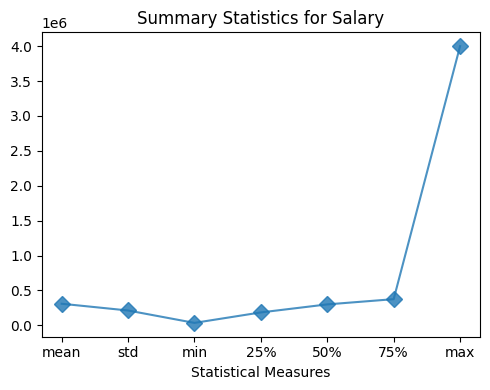

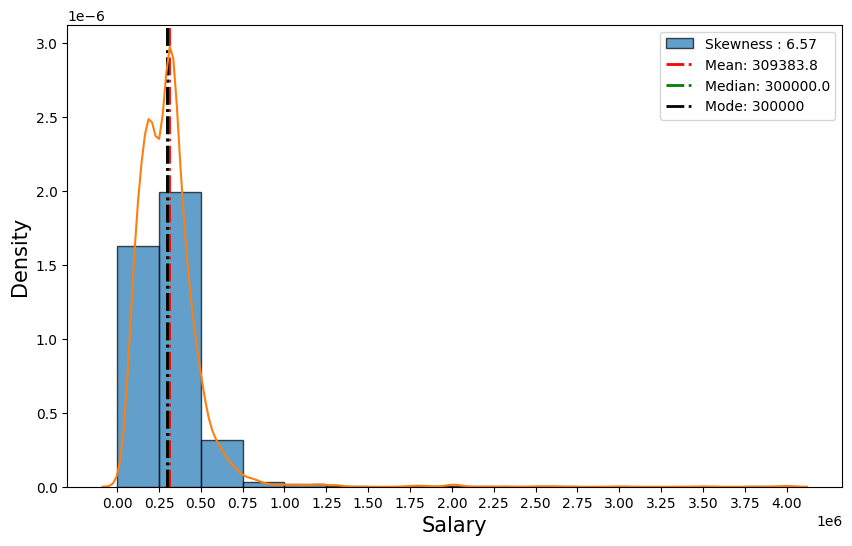

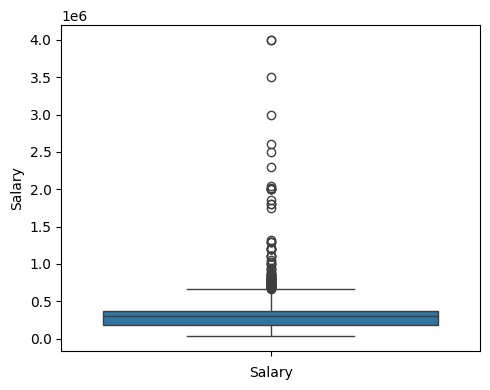

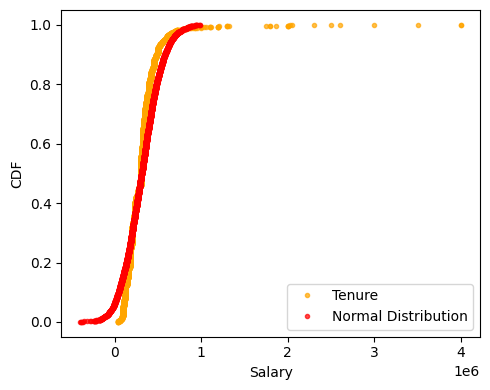

In [ ]:
# Summary Plot

plt.figure(figsize=(5,4))
amcat_data2['Salary'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Salary')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(0, amcat_data2['Salary'].max()+250000, 250000)
plt.figure(figsize = (10,6))
plt.hist(amcat_data2['Salary'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(amcat_data2['Salary'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('Salary', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(amcat_data2['Salary'].mean(), label = f"Mean: {round(amcat_data2['Salary'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(amcat_data2['Salary'].median(), label = f"Median: {round(amcat_data2['Salary'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(amcat_data2['Salary'].mode()[0], label = f"Mode: {round(amcat_data2['Salary'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(amcat_data2['Salary'])
plt.legend()
plt.show()

# Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(amcat_data2['Salary'])
plt.xlabel('Salary')
plt.tight_layout()
plt.show()

# CDF

plt.figure(figsize=(5,4))
x_salary, y_salary = CDF(amcat_data2['Salary'])
x_sample_salary, y_sample_salary = \
CDF(np.random.normal(amcat_data2['Salary'].mean(), amcat_data2['Salary'].std(), size = len(amcat_data2['Salary'])))
plt.plot(x_salary, y_salary, linestyle = 'None',
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'Tenure')
plt.plot(x_sample_salary, y_sample_salary, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Salary')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

#### Key Findings from Salary Data:

**Salary Variation:**

* Big differences in salaries exist across the dataset.

**Distribution:**

* Salaries are skewed positively: many people earn less, while a few earn significantly more.
* On average, everyone makes roughly the same (mean, median, and mode are close).
* Skewness value of 6 indicates a strong departure from a normal distribution.

**High Earners:**

* Box plot shows a concentration of people with high salaries.

**Not Normal:**

* The CDF confirms the data is not normally distributed, deviating significantly from a typical bell-curve pattern.

**Key Takeaways:**

* Most people earn within a certain range, but a few individuals earn much more.
* Salaries are not evenly spread, with a higher concentration of lower earners.
* This data does not follow a normal distribution, meaning standard statistical methods might need adjustments.


1.3 **10th Percentage**

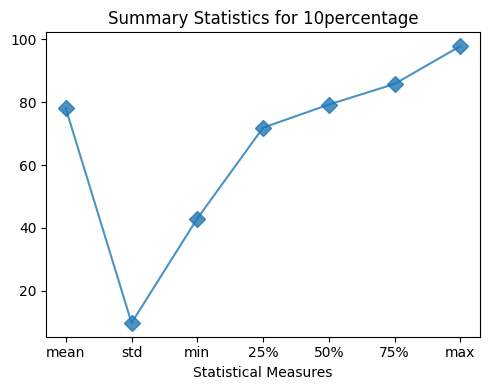

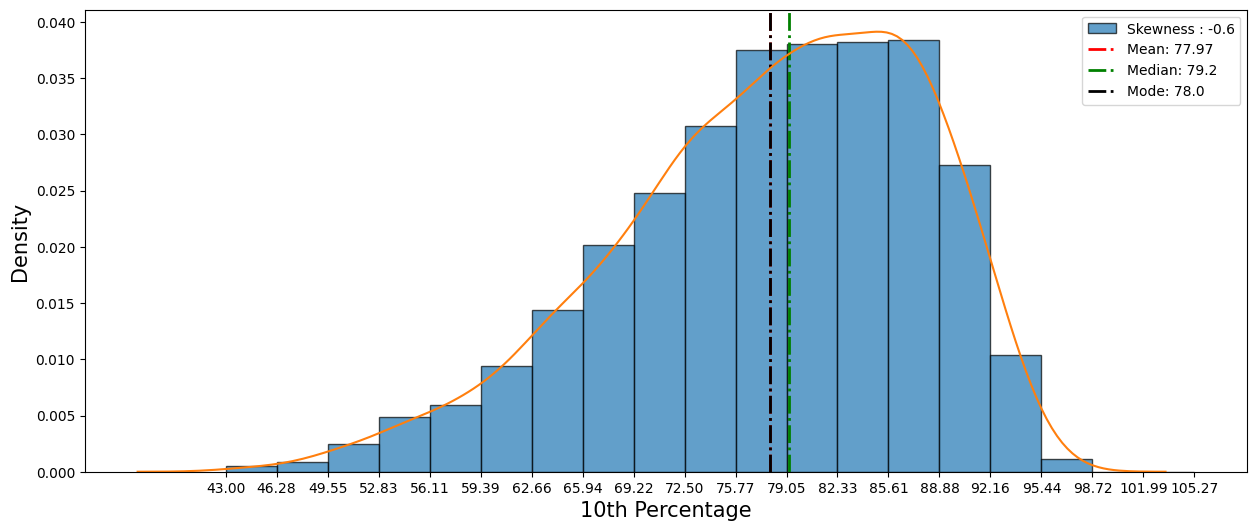

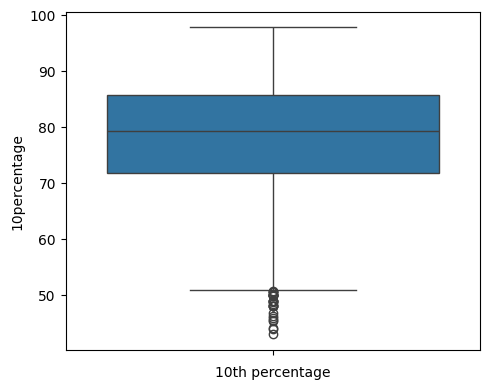

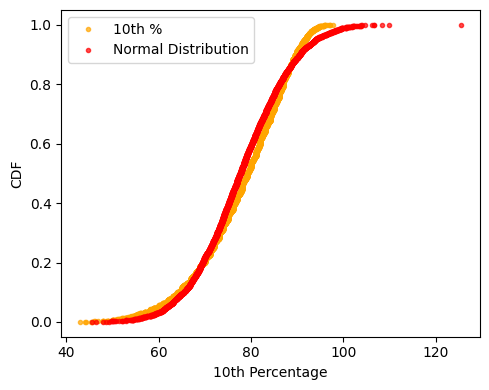

In [ ]:
# Summary Plot

plt.figure(figsize=(5,4))
amcat_data2['10percentage'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for 10percentage')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

#Histogram


bins = np.arange(amcat_data2['10percentage'].min(), amcat_data2['10percentage'].max()+amcat_data2['10percentage'].std(),
                 amcat_data2['10percentage'].std()/3)
plt.figure(figsize = (15,6))
plt.hist(amcat_data2['10percentage'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(amcat_data2['10percentage'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('10th Percentage', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(amcat_data2['10percentage'].mean(), label = f"Mean: {round(amcat_data2['10percentage'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(amcat_data2['10percentage'].median(), label = f"Median: {round(amcat_data2['10percentage'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(amcat_data2['10percentage'].mode()[0], label = f"Mode: {round(amcat_data2['10percentage'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(amcat_data2['10percentage'])
plt.legend()
plt.show()

#Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(amcat_data2['10percentage'])
plt.xlabel('10th percentage')
plt.tight_layout()
plt.show()

# CDF

plt.figure(figsize=(5,4))
x_10, y_10 = CDF(amcat_data2['10percentage'])
x_sample_10 , y_sample_10 = \
CDF(np.random.normal(amcat_data2['10percentage'].mean(), amcat_data2['10percentage'].std(), size = len(amcat_data2['10percentage'])))
plt.plot(x_10, y_10, linestyle = 'None',
        marker = '.', color = 'orange',
         alpha = 0.7, label = '10th %')
plt.plot(x_sample_10, y_sample_10, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('10th Percentage')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

#### Key Findings from Score Data:

**Most Students Score Well:**

* Half of the students scored around 80% or lower.

**Score Distribution:**

* Few students scored very low.
* Most scores fall between 75% and 90%.
* The most common score is 78%.
* Average score is around 77%.

**Outliers:**

* A few students scored significantly higher than the rest.

**Not Normal Distribution:**

* The data is not evenly spread across all scores.
* Scores don't follow a typical bell-curve pattern.

**Key Takeaways:**

* While many students scored well, some outliers achieved much higher results.
* The majority scored within a specific range, with most scores falling between 75% and 90%.
* This data is not normally distributed, so standard statistical methods might need adjustments.


1.4 **12th Percentage**

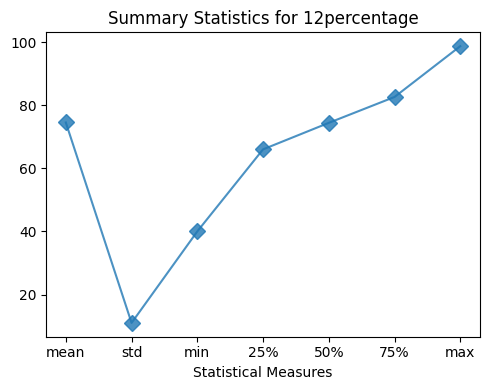

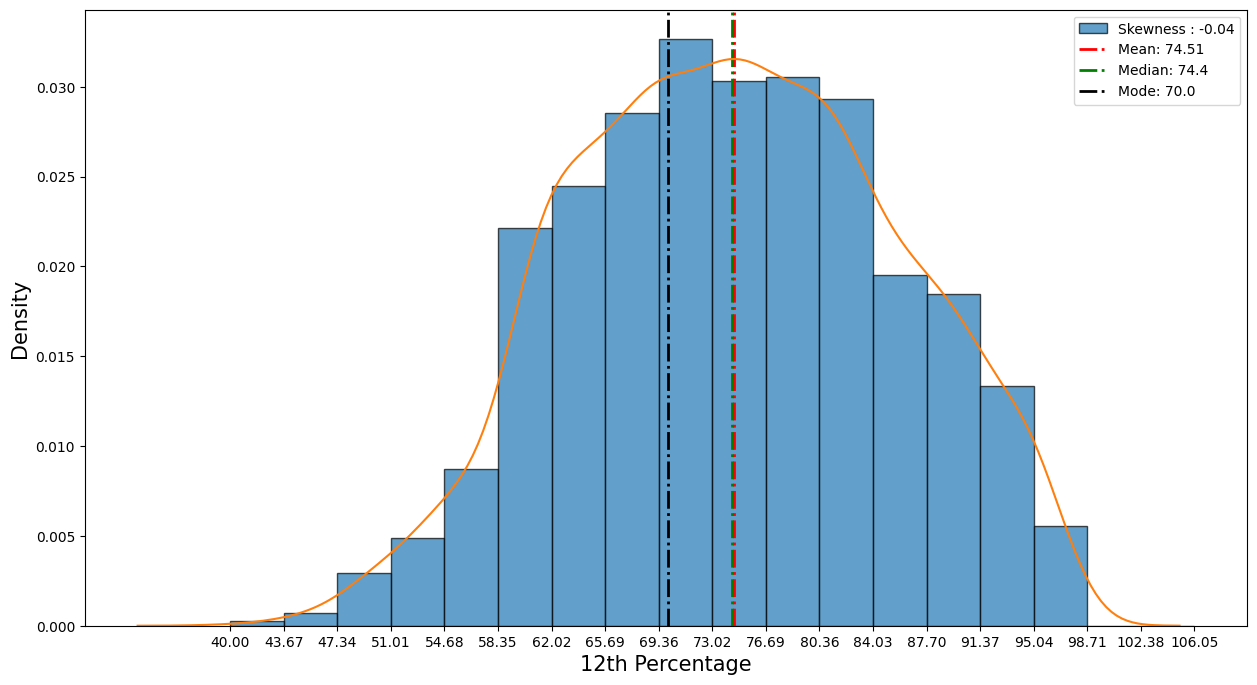

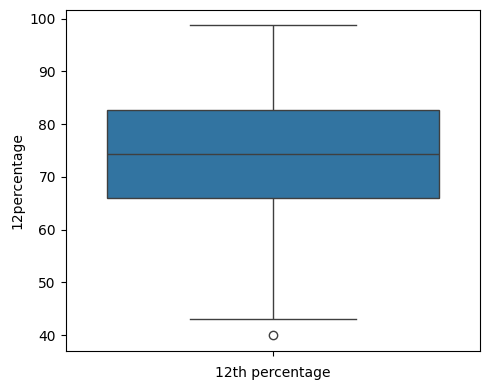

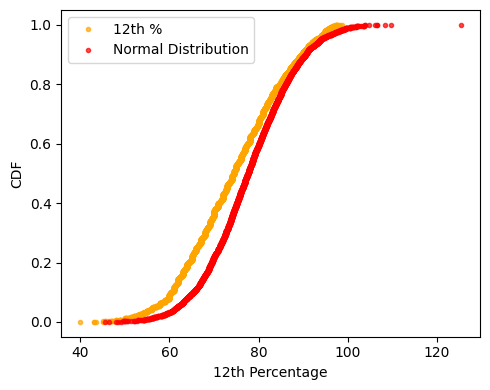

In [ ]:
# Summary Plot

plt.figure(figsize=(5,4))
amcat_data2['12percentage'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for 12percentage')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(amcat_data2['12percentage'].min(), amcat_data2['12percentage'].max()+amcat_data2['12percentage'].std(),
                 amcat_data2['12percentage'].std()/3)
plt.figure(figsize = (15,8))
plt.hist(amcat_data2['12percentage'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(amcat_data2['12percentage'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('12th Percentage', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(amcat_data2['12percentage'].mean(), label = f"Mean: {round(amcat_data2['12percentage'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(amcat_data2['12percentage'].median(), label = f"Median: {round(amcat_data2['12percentage'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(amcat_data2['12percentage'].mode()[0], label = f"Mode: {round(amcat_data2['12percentage'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(amcat_data2['12percentage'])
plt.legend()
plt.show()

#Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(amcat_data2['12percentage'])
plt.xlabel('12th percentage')
plt.tight_layout()
plt.show()

# CDF

plt.figure(figsize=(5,4))
x_12, y_12 = CDF(amcat_data2['12percentage'])
x_sample_12 , y_sample_12 = \
CDF(np.random.normal(amcat_data2['12percentage'].mean(), amcat_data2['12percentage'].std(), size = len(amcat_data2['12percentage'])))
plt.plot(x_12, y_12, linestyle = 'None',
        marker = '.', color = 'orange',
         alpha = 0.7, label = '12th %')
plt.plot(x_sample_10, y_sample_10, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('12th Percentage')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

**Score Distribution:**

* **Most Students Score Well:** About half of the students scored below 78%.
* **Concentration in Mid-Range:** The majority (between 69% and 84%) scored within a specific range.
* **Average and Peak:** The average score is around 74%, with 70% being the most common score.
* **Few Low Scores:** Students with very low scores are scarce.
* **One Outlier:** Only one student has an extremely low score (visible in the box plot).
* **Non-Normal Distribution:** The data does not follow a typical bell-curve pattern (confirmed by the CDF).


#### 1.5 **CollegeGPA**

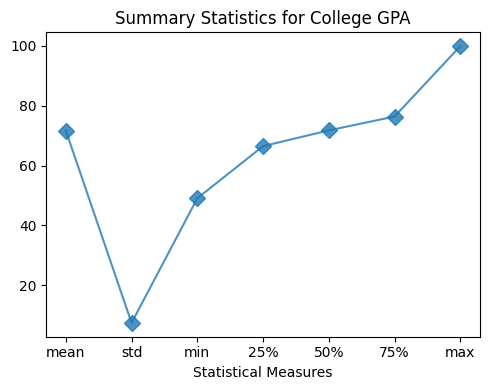

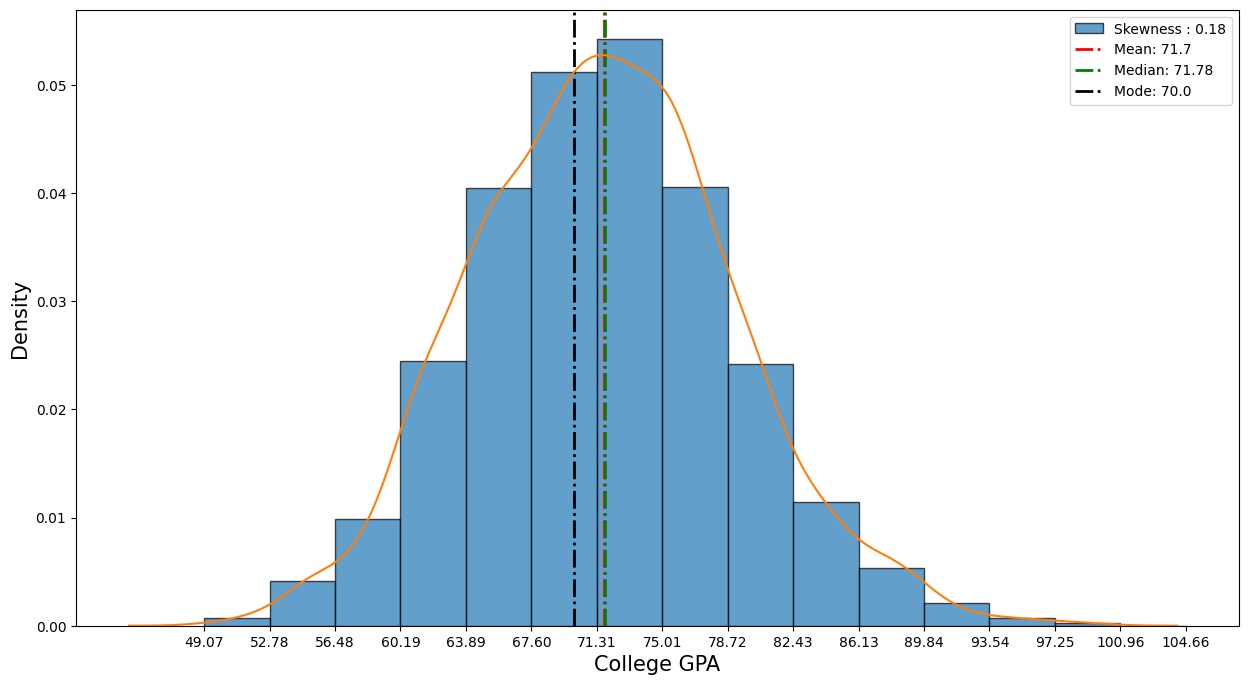

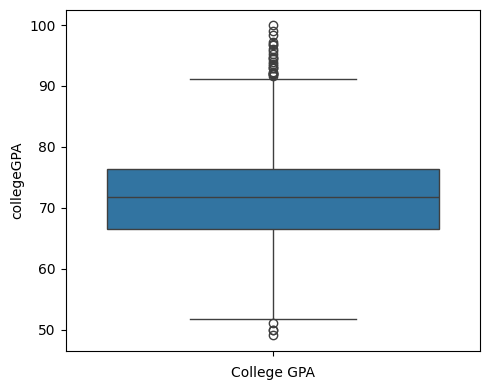

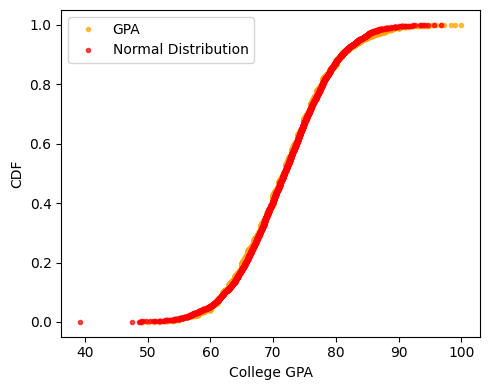

In [ ]:
#Summary Plot

plt.figure(figsize=(5,4))
amcat_data2['collegeGPA'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for College GPA')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(amcat_data2['collegeGPA'].min(), amcat_data2['collegeGPA'].max()+amcat_data2['collegeGPA'].std(),
                 amcat_data2['collegeGPA'].std()/2)
plt.figure(figsize = (15,8))
plt.hist(amcat_data2['collegeGPA'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(amcat_data2['collegeGPA'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('College GPA', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(amcat_data2['collegeGPA'].mean(), label = f"Mean: {round(amcat_data2['collegeGPA'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(amcat_data2['collegeGPA'].median(), label = f"Median: {round(amcat_data2['collegeGPA'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(amcat_data2['collegeGPA'].mode()[0], label = f"Mode: {round(amcat_data2['collegeGPA'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(amcat_data2['collegeGPA'])
plt.legend()
plt.show()

# Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(amcat_data2['collegeGPA'])
plt.xlabel('College GPA')
plt.tight_layout()
plt.show()

# CDF

plt.figure(figsize=(5,4))
x_gpa, y_gpa = CDF(amcat_data2['collegeGPA'])
x_sample_gpa , y_sample_gpa = \
CDF(np.random.normal(amcat_data2['collegeGPA'].mean(), amcat_data2['collegeGPA'].std(), size = len(amcat_data2['12percentage'])))
plt.plot(x_gpa, y_gpa, linestyle = 'None',
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'GPA')
plt.plot(x_sample_gpa, y_sample_gpa, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('College GPA')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

#### Key Findings from GPA Data:

**Most Students Score Well:**

* Around 75% of students scored 80% or lower on their GPA.

**GPA Distribution:**

* Most GPAs fall within a specific range, between 63% and 78%.
* The most common score was 70%.
* The average GPA was around 74%.

**Outliers:**

* A few students scored significantly higher or lower than the rest.

**Normal Distribution:**

* The data appears to follow a normal distribution pattern (based on the CDF).


#### 1.6 **English**

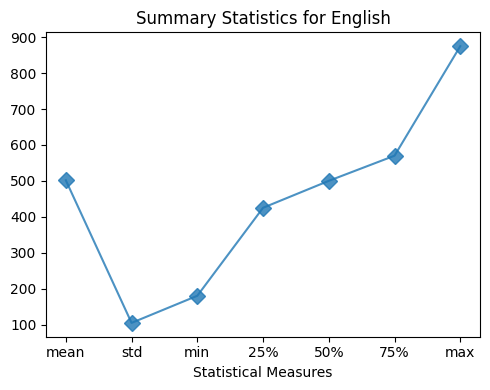

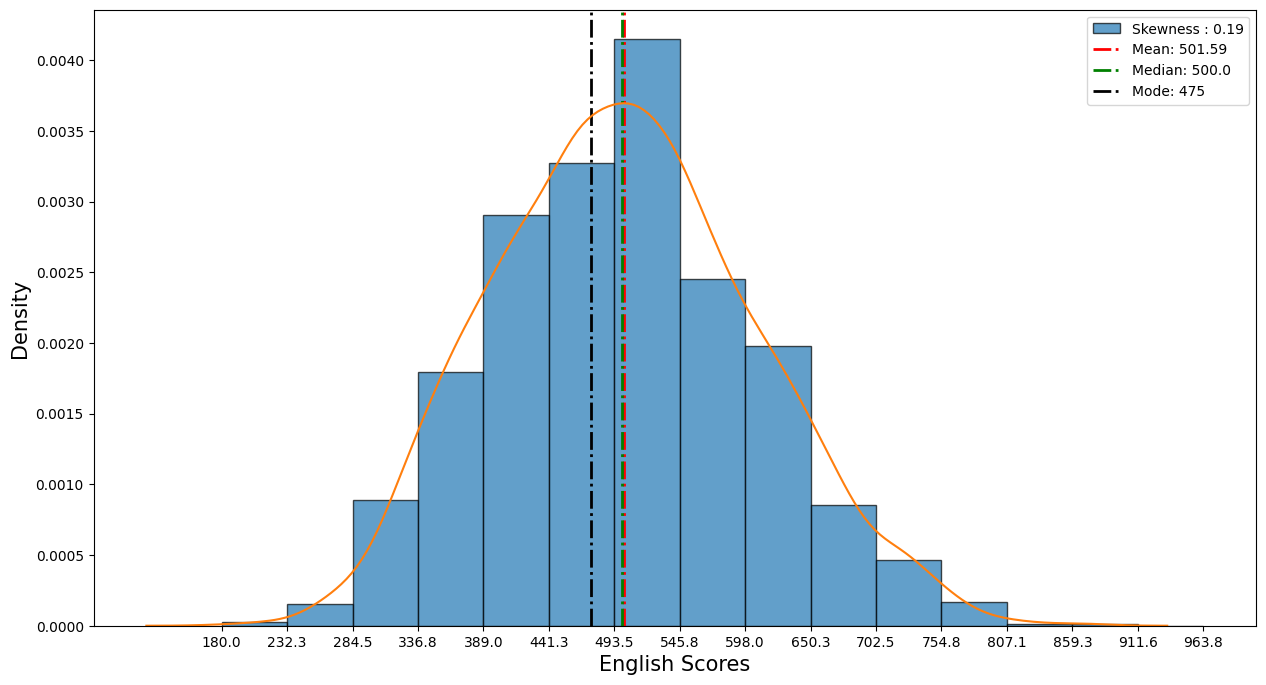

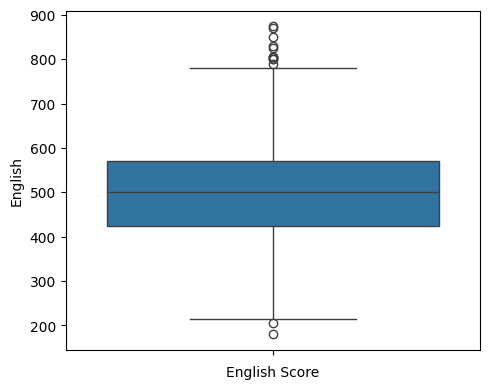

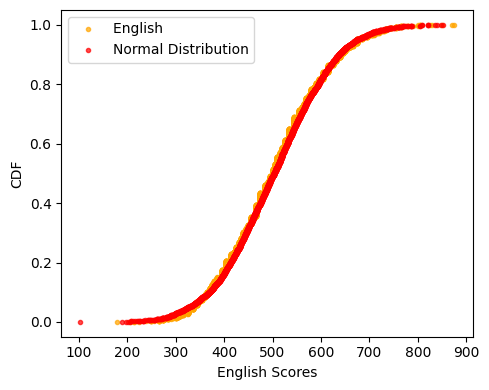

In [ ]:
# Summary Plot

plt.figure(figsize=(5,4))
amcat_data2['English'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for English')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(amcat_data2['English'].min(), amcat_data2['English'].max()+amcat_data2['English'].std(),
                 amcat_data2['English'].std()/2)
plt.figure(figsize = (15,8))
plt.hist(amcat_data2['English'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(amcat_data2['English'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('English Scores', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(amcat_data2['English'].mean(), label = f"Mean: {round(amcat_data2['English'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(amcat_data2['English'].median(), label = f"Median: {round(amcat_data2['English'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(amcat_data2['English'].mode()[0], label = f"Mode: {round(amcat_data2['English'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(amcat_data2['English'])
plt.legend()
plt.show()

# Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(amcat_data2['English'])
plt.xlabel('English Score')
plt.tight_layout()
plt.show()

# CDF

plt.figure(figsize=(5,4))
x_eng, y_eng = CDF(amcat_data2['English'])
x_sample_eng , y_sample_eng = \
CDF(np.random.normal(amcat_data2['English'].mean(), amcat_data2['English'].std(), size = len(amcat_data2['English'])))
plt.plot(x_eng, y_eng, linestyle = 'None',
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'English ')
plt.plot(x_sample_eng, y_sample_eng, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('English Scores')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

#### Key Findings from English Exam Scores:

**Many Scores Around Average:**

* About half of the students scored below 500 on the English exam.

**Majority in Mid-Range:**

* Most scores were between 389 and 545, with a peak at 475.

**Average Performance:**

* The average score was 502.

**Outliers Present:**

* Both very low and very high scores were present, as shown by the box plot.

**Normal Distribution:**

* The CDF suggests the data follows a normal distribution pattern.



#### 1.7 **Logical**

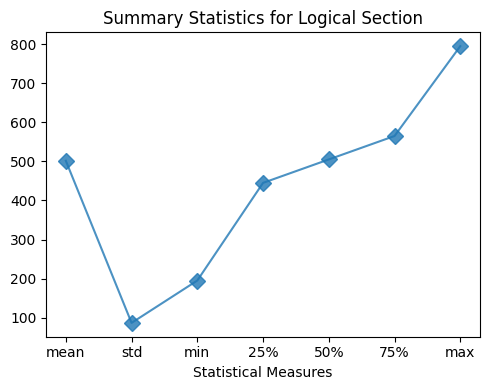

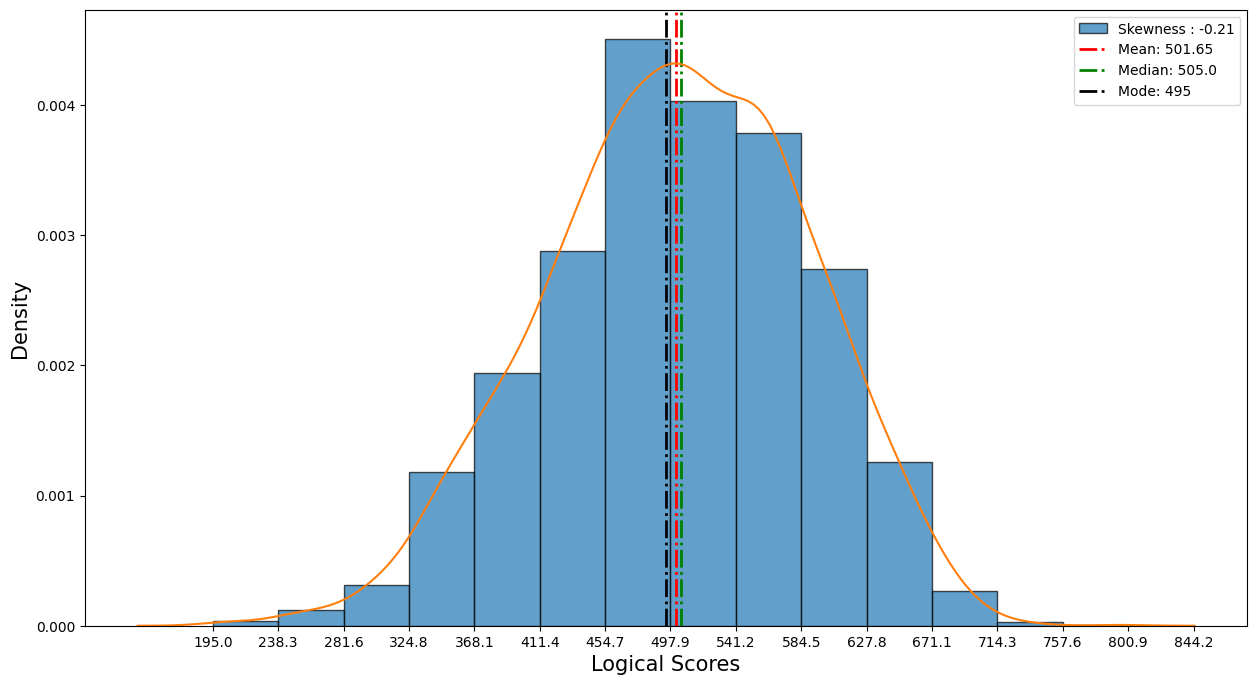

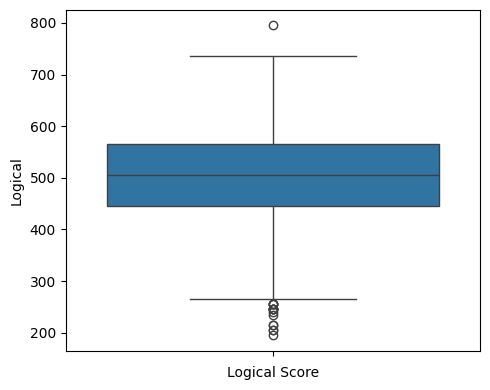

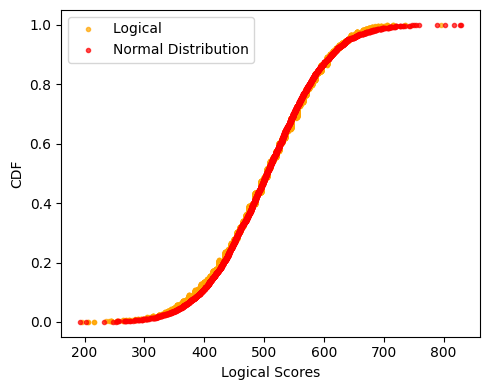

In [ ]:
# Summary Plot

plt.figure(figsize=(5,4))
amcat_data2['Logical'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Logical Section')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(amcat_data2['Logical'].min(), amcat_data2['Logical'].max()+amcat_data2['Logical'].std(),
                 amcat_data2['Logical'].std()/2)
plt.figure(figsize = (15,8))
plt.hist(amcat_data2['Logical'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(amcat_data2['Logical'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('Logical Scores', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(amcat_data2['Logical'].mean(), label = f"Mean: {round(amcat_data2['Logical'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(amcat_data2['Logical'].median(), label = f"Median: {round(amcat_data2['Logical'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(amcat_data2['Logical'].mode()[0], label = f"Mode: {round(amcat_data2['Logical'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(amcat_data2['Logical'])
plt.legend()
plt.show()

# Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(amcat_data2['Logical'])
plt.xlabel('Logical Score')
plt.tight_layout()
plt.show()

# CDF

plt.figure(figsize=(5,4))
x_log, y_log = CDF(amcat_data2['Logical'])
x_sample_log , y_sample_log = \
CDF(np.random.normal(amcat_data2['Logical'].mean(), amcat_data2['Logical'].std(), size = len(amcat_data2['Logical'])))
plt.plot(x_log, y_log, linestyle = 'None',
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'Logical ')
plt.plot(x_sample_log, y_sample_log, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Logical Scores')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

#### Key Findings from Logical Exam Scores:

**Half Score Below Average:**

* Around half of the students scored below 500 on the logical exam.

**Majority in Mid-Range:**

* Most scores were between 454 and 584, with a peak at 495.

**Average Performance:**

* The average score was 502.

**Few High Scores, More Low Scores:**

* The box plot shows mainly lower outliers, with only one high outlier.

**Normal Distribution:**

* The CDF suggests the data follows a normal distribution pattern.

#### 1.8 **Quant**

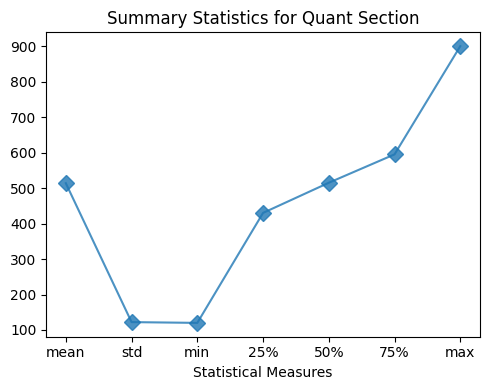

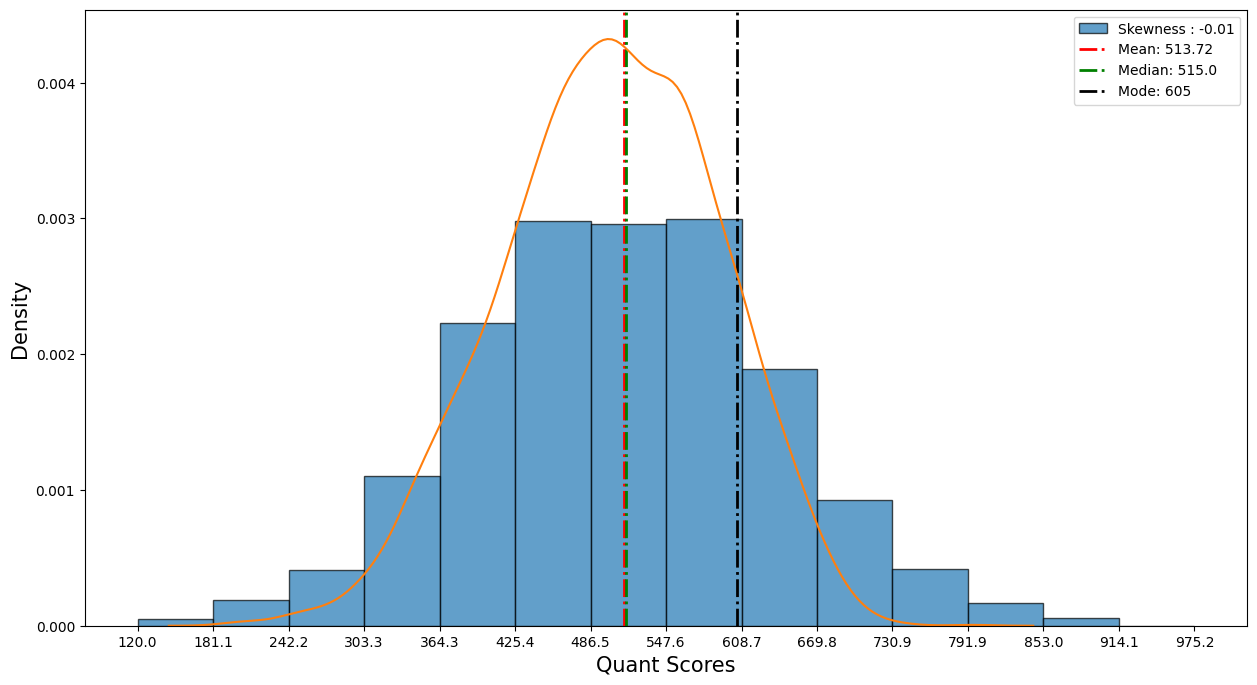

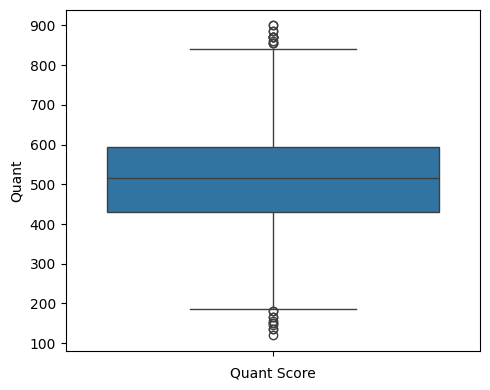

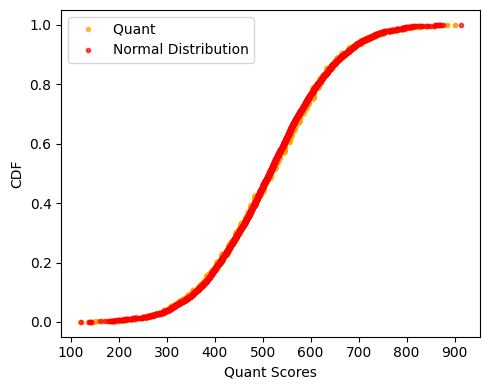

In [ ]:
# Summary Plot

plt.figure(figsize=(5,4))
amcat_data2['Quant'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Quant Section')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(amcat_data2['Quant'].min(), amcat_data2['Quant'].max()+amcat_data2['Quant'].std(),
                 amcat_data2['Quant'].std()/2)
plt.figure(figsize = (15,8))
plt.hist(amcat_data2['Quant'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(amcat_data2['Quant'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('Quant Scores', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(amcat_data2['Quant'].mean(), label = f"Mean: {round(amcat_data2['Quant'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(amcat_data2['Quant'].median(), label = f"Median: {round(amcat_data2['Quant'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(amcat_data2['Quant'].mode()[0], label = f"Mode: {round(amcat_data2['Quant'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(amcat_data2['Logical'])
plt.legend()
plt.show()

# Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(amcat_data2['Quant'])
plt.xlabel('Quant Score')
plt.tight_layout()
plt.show()

# CDF

plt.figure(figsize=(5,4))
x_q, y_q = CDF(amcat_data2['Quant'])
x_sample_q , y_sample_q = \
CDF(np.random.normal(amcat_data2['Quant'].mean(), amcat_data2['Quant'].std(), size = len(amcat_data2['Quant'])))
plt.plot(x_q, y_q, linestyle = 'None',
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'Quant ')
plt.plot(x_sample_q, y_sample_q, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Quant Scores')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

#### Key Findings from Logical Exam Scores:

**Many Scores Around Average:**

* Three quarters of students scored below 600 on the logical exam.

**Majority in Mid-Range:**

* Most scores fell between 425 and 608, with the most common score being 605.

**Average Performance:**

* The average score was 513.

**Outliers Present:**

* Both very low and very high scores were present, as shown by the box plot.

**Normal Distribution:**

* The CDF suggests the data follows a normal distribution pattern.

#### 1.9 **Computer Programming**

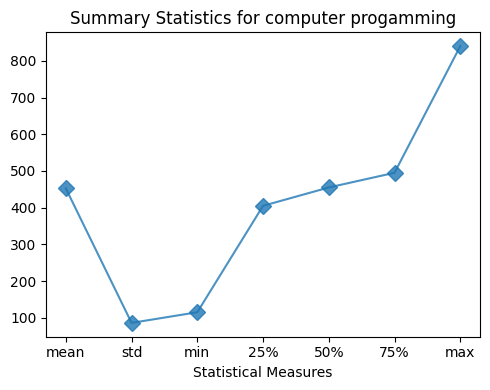

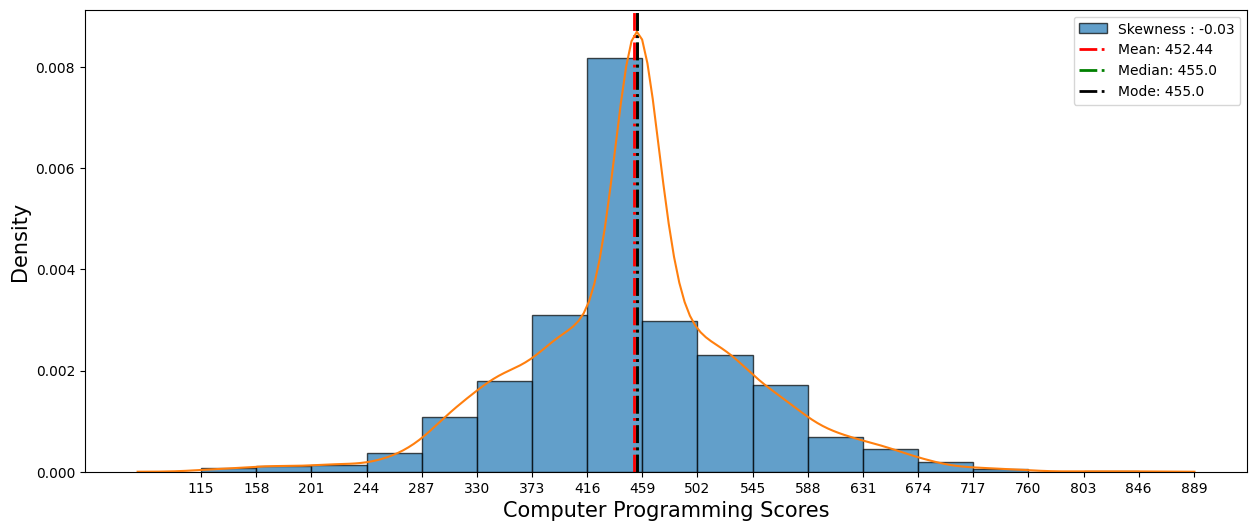

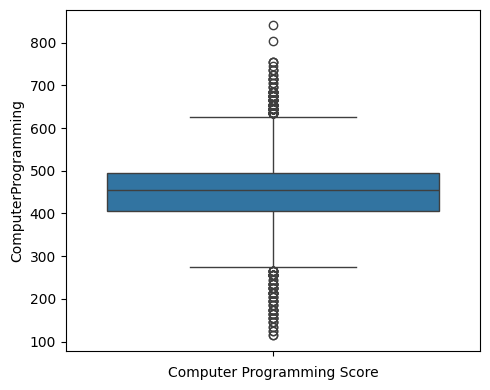

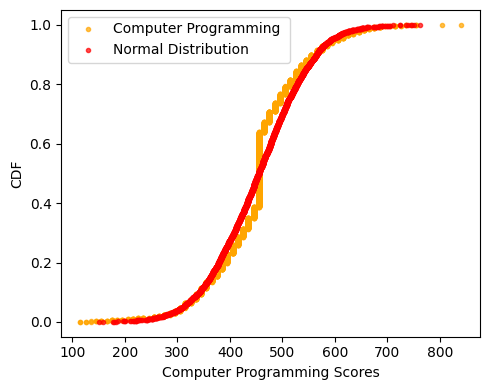

In [ ]:
# Summary Plot

plt.figure(figsize=(5,4))
amcat_data2['ComputerProgramming'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for computer progamming')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(amcat_data2['ComputerProgramming'].min(), amcat_data2['ComputerProgramming'].max()+amcat_data2['ComputerProgramming'].std(),
                 amcat_data2['ComputerProgramming'].std()/2)
plt.figure(figsize = (15,6))
plt.hist(amcat_data2['ComputerProgramming'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(amcat_data2['ComputerProgramming'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('Computer Programming Scores', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(amcat_data2['ComputerProgramming'].mean(), label = f"Mean: {round(amcat_data2['ComputerProgramming'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(amcat_data2['ComputerProgramming'].median(), label = f"Median: {round(amcat_data2['ComputerProgramming'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(amcat_data2['ComputerProgramming'].mode()[0], label = f"Mode: {round(amcat_data2['ComputerProgramming'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(amcat_data2['ComputerProgramming'])
plt.legend()
plt.show()

# Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(amcat_data2['ComputerProgramming'])
plt.xlabel('Computer Programming Score')
plt.tight_layout()
plt.show()

# CDF

plt.figure(figsize=(5,4))
x_cp, y_cp = CDF(amcat_data2['ComputerProgramming'])
x_sample_cp , y_sample_cp = \
CDF(np.random.normal(amcat_data2['ComputerProgramming'].mean(), amcat_data2['ComputerProgramming'].std(), size = \
                     len(amcat_data2['ComputerProgramming'])))
plt.plot(x_cp, y_cp, linestyle = 'None',
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'Computer Programming ')
plt.plot(x_sample_cp, y_sample_cp, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Computer Programming Scores')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

#### Key Findings from Quant Exam Scores:

**Half Score Below Average:**

* Around half of the students scored below 500 on the quant exam.

**Majority in Narrow Range:**

* Most scores were clustered between 416 and 459, with a peak at 455.

**Lower Average:**

* The average score was 452.

**Extreme Scores:**

* The box plot reveals many students with both very low and very high scores.

**Non-Normal Distribution:**

* The CDF indicates the data does not follow a typical bell-curve pattern.


#### 1.10 **Electronics & Semiconductors

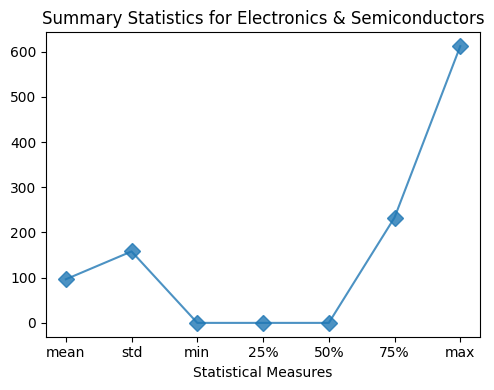

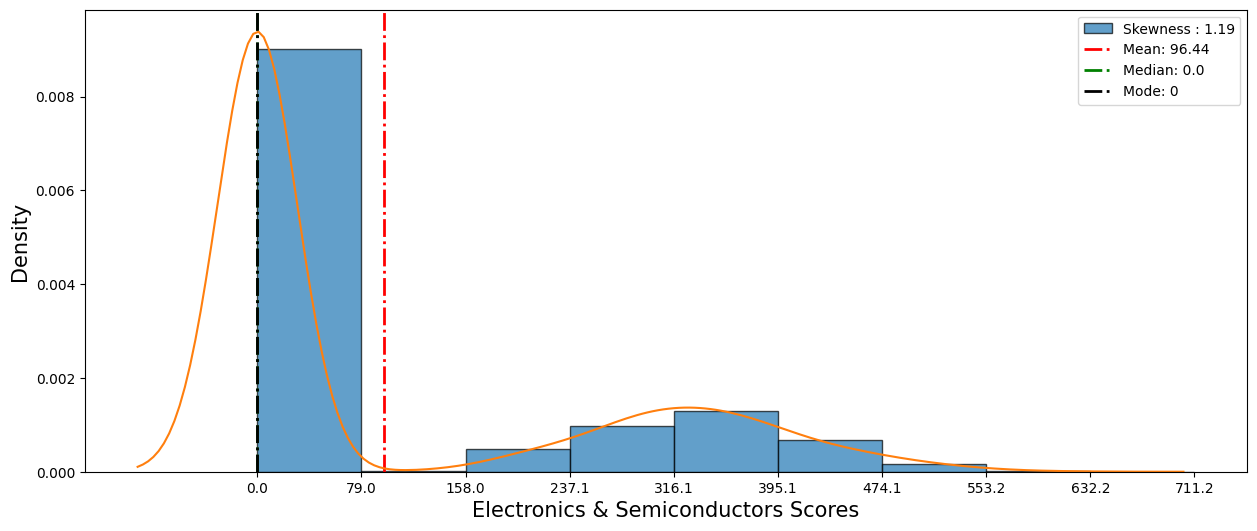

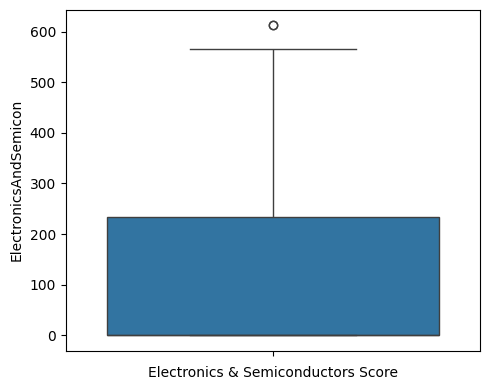

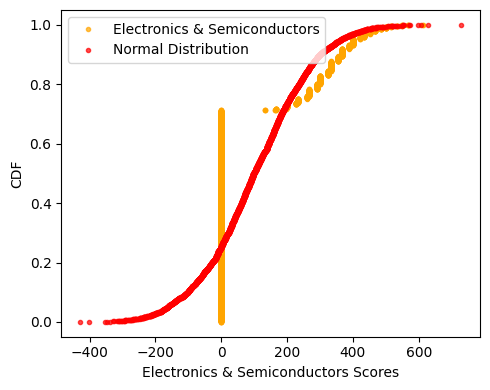

In [ ]:
# Summary Plot

plt.figure(figsize=(5,4))
amcat_data2['ElectronicsAndSemicon'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Electronics & Semiconductors')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(amcat_data2['ElectronicsAndSemicon'].min(), amcat_data2['ElectronicsAndSemicon'].max()+amcat_data2['ElectronicsAndSemicon'].std(),
                 amcat_data2['ElectronicsAndSemicon'].std()/2)
plt.figure(figsize = (15,6))
plt.hist(amcat_data2['ElectronicsAndSemicon'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(amcat_data2['ElectronicsAndSemicon'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('Electronics & Semiconductors Scores', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(amcat_data2['ElectronicsAndSemicon'].mean(), label = f"Mean: {round(amcat_data2['ElectronicsAndSemicon'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(amcat_data2['ElectronicsAndSemicon'].median(), label = f"Median: {round(amcat_data2['ElectronicsAndSemicon'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(amcat_data2['ElectronicsAndSemicon'].mode()[0], label = f"Mode: {round(amcat_data2['ElectronicsAndSemicon'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(amcat_data2['ElectronicsAndSemicon'])
plt.legend()
plt.show()

# Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(amcat_data2['ElectronicsAndSemicon'])
plt.xlabel('Electronics & Semiconductors Score')
plt.tight_layout()
plt.show()

# CDF

plt.figure(figsize=(5,4))
x_cp, y_cp = CDF(amcat_data2['ElectronicsAndSemicon'])
x_sample_cp , y_sample_cp = \
CDF(np.random.normal(amcat_data2['ElectronicsAndSemicon'].mean(), amcat_data2['ElectronicsAndSemicon'].std(), size = \
                     len(amcat_data2['ElectronicsAndSemicon'])))
plt.plot(x_cp, y_cp, linestyle = 'None',
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'Electronics & Semiconductors')
plt.plot(x_sample_cp, y_sample_cp, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Electronics & Semiconductors Scores')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

**Key Findings from Domain Scores:**

* **Majority Score Low:** Roughly 75% of students scored below 250.
* **Concentrated at Low End:** Most scores were clustered between 0 and 79, with many scoring 0 (the highest frequency).
* **Overall Average:** The average score was 96, potentially skewed by the low-end concentration.
* **Median and Lowest Score:** Double-check if the lowest score is indeed equal to the median. This might indicate a specific distribution feature.
* **Non-Normal Distribution:** The data does not follow a typical bell-curve pattern, requiring different statistical methods.

#### 1.11 **Age**

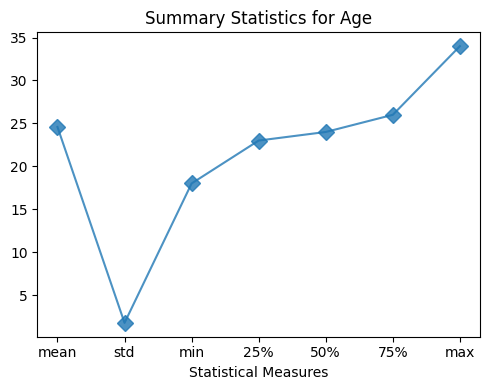

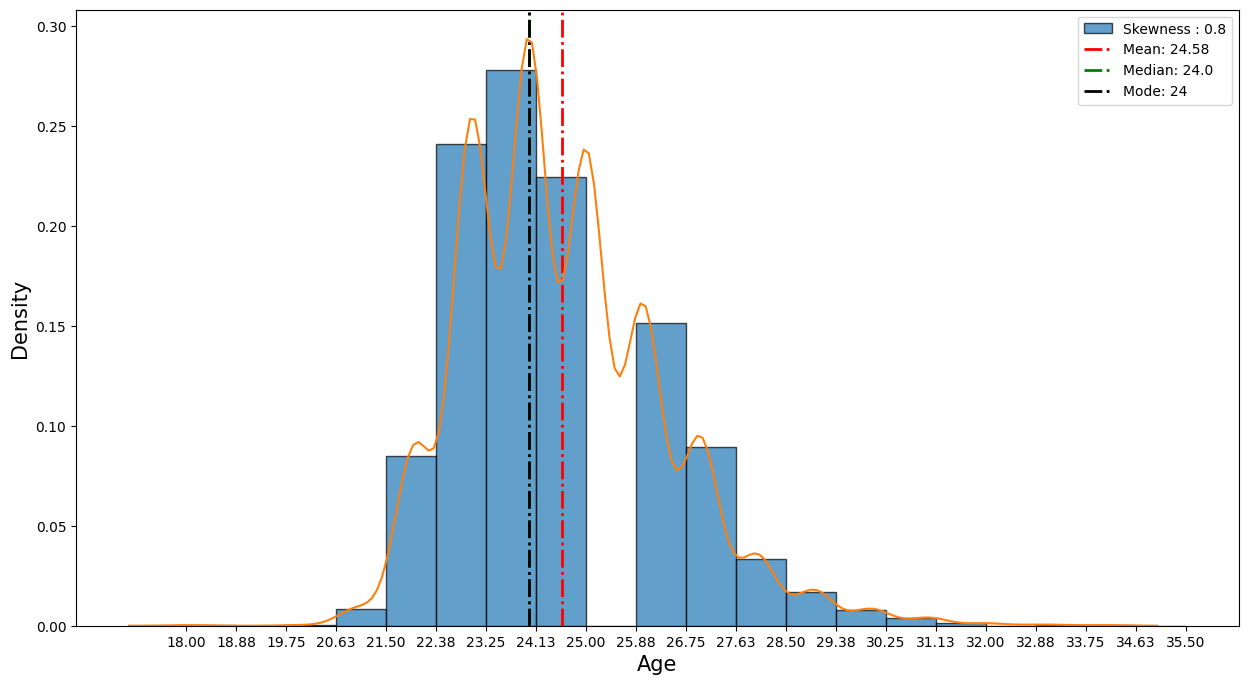

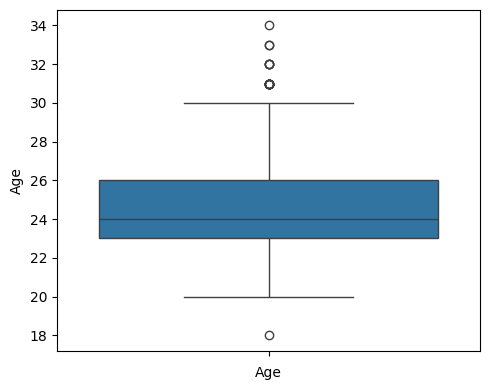

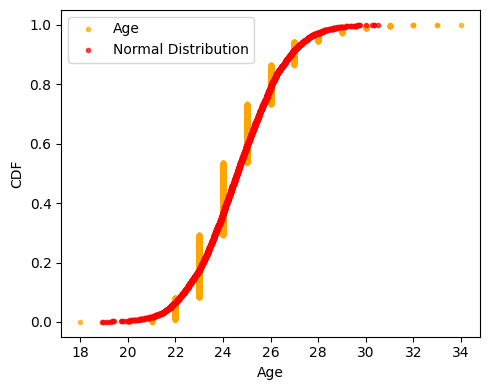

In [ ]:
# Summary Plot

plt.figure(figsize=(5,4))
amcat_data2['Age'].describe()[1:].plot(alpha = 0.8,
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Age')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram

bins = np.arange(amcat_data2['Age'].min(), amcat_data2['Age'].max()+amcat_data2['Age'].std(),
                 amcat_data2['Age'].std()/2)
plt.figure(figsize = (15,8))
plt.hist(amcat_data2['Age'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(amcat_data2['Age'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('Age', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(amcat_data2['Age'].mean(), label = f"Mean: {round(amcat_data2['Age'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(amcat_data2['Age'].median(), label = f"Median: {round(amcat_data2['Age'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(amcat_data2['Age'].mode()[0], label = f"Mode: {round(amcat_data2['Age'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(amcat_data2['Age'])
plt.legend()
plt.show()

# Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(amcat_data2['Age'])
plt.xlabel('Age')
plt.tight_layout()
plt.show()

# CDF

plt.figure(figsize=(5,4))
x_cp, y_cp = CDF(amcat_data2['Age'])
x_sample_cp , y_sample_cp = \
CDF(np.random.normal(amcat_data2['Age'].mean(), amcat_data2['Age'].std(), size = \
                     len(amcat_data2['Age'])))
plt.plot(x_cp, y_cp, linestyle = 'None',
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'Age')
plt.plot(x_sample_cp, y_sample_cp, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Age')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

#### Key Findings from Age Data:

**Most Students Young:**

* Around 75% of students are under 26 years old.

**Majority in Mid-20s:**

* Most students' ages fall between 22 and 25.
* The average, median, and most frequent age are all around 25 years old.

**Few Outliers:**

* The box plot shows 4 students significantly older than the rest and 1 student much younger.

**Non-Normal Distribution:**

* The age data does not follow a typical bell-curve pattern.

## 2) **Categorical Features**

### 2.1 **Designation**

In [ ]:
amcat_data2['Designation'].value_counts()[1:].sort_values(
    ascending=True).plot(
    kind='barh',
    title='Designation Counts',
    figsize=(7, 3),
    ec='k'
)
plt.ylabel('Designation')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

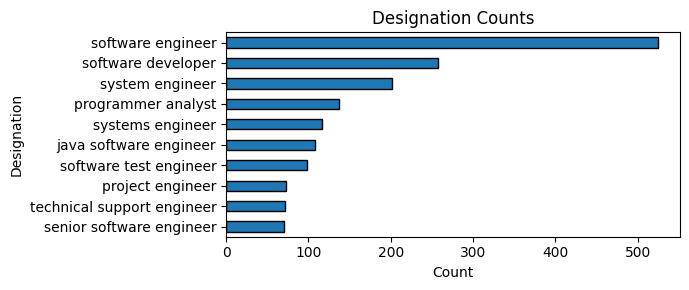

Observation:

#### Most Popular Job Titles:

* **Software Engineer:** This is the most common designation, followed by...
* **System Engineer:** Second most frequent title.
* **Software Developer:** Third most common job title.

**Note:** This only shows the top three and excludes the "Other" category.

This rewrite is simpler and more concise, while still conveying the key information. I hope it's helpful!


#### 2.2 **JobCity**

In [ ]:
amcat_data2['JobCity'].value_counts().sort_values(ascending=True).plot(
    kind='barh',
    cmap='summer',
    title='City Counts',
    figsize=(6,3),
    ec='k'
)
plt.ylabel('City')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

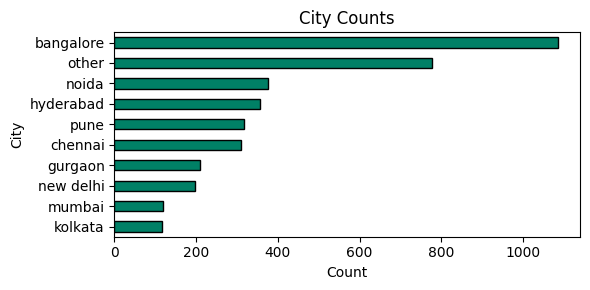

Observation:

**Top Cities for Job Placements:**

* **Bangalore:** The top city for grabbing jobs, followed by...
* **Noida, Hyderabad, Pune:** These three cities offer good job opportunities.
* **Mumbai, Kolkata:** Fewer job placements compared to the others.


#### 2.3 **Gender**

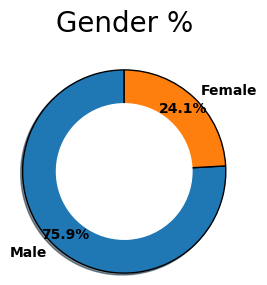

In [ ]:
plt.figure(figsize=(3,3))
plt.pie(amcat_data2['Gender'].value_counts().tolist(),
        labels=amcat_data2['Gender'].value_counts().index,
        autopct='%1.1f%%',
        radius=1.5,
        wedgeprops={'edgecolor': 'k'},
        textprops={'fontsize': 10, 'fontweight': 'bold'},
        shadow=True,
        startangle=90,
        pctdistance=0.85)
plt.pie(amcat_data2['Gender'].value_counts().tolist(),
        colors=['white'],
        wedgeprops={'edgecolor': 'white'},
        radius=1)
plt.title('Gender %', pad=40, size=20)
plt.tight_layout()
plt.show()

Observation:

**Unequal Gender Distribution:**

The data shows a significant difference in the number of males and females, with males being much more prevalent. This imbalance could impact the analysis of the dataset, so it's important to consider this when interpreting the results.



#### 2.4 **10board and 12board**

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

amcat_data2['10board'].str.upper().value_counts().sort_values(ascending=True).plot(
    kind='barh',
    ax=ax[0],
    ec='k',
    title='10th Boards'
)
ax[0].set_ylabel('Board', size=15)

amcat_data2['12board'].str.upper().value_counts().sort_values(ascending=True).plot(
    kind='barh',
    ax=ax[1],
    ec='k',
    title='12th Boards'
)
ax[1].set_ylabel('Board', size=15)
ax[1].set_xlabel('Count', size=15)

plt.tight_layout()
plt.show()

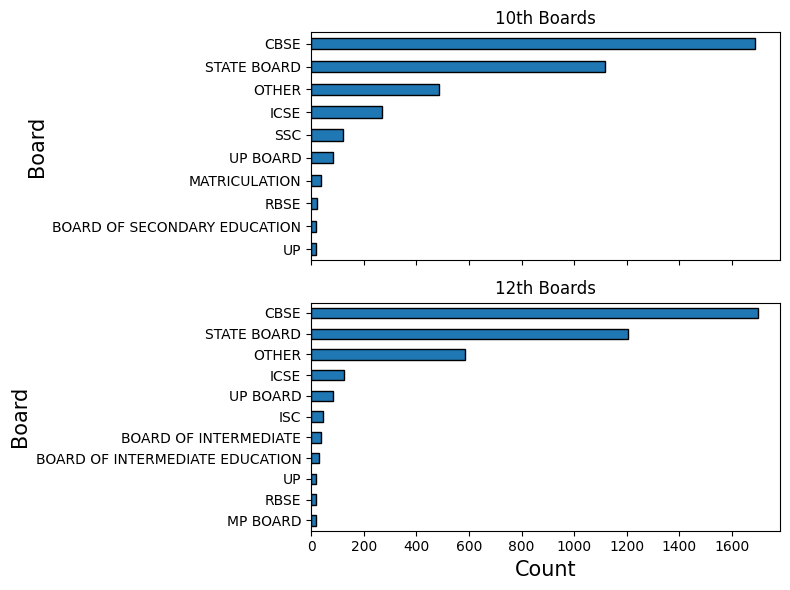

#### Most Students Graduated from CBSE Board:

* **12th Grade:** The majority of students completed their 12th grade under the CBSE board.
* **10th Grade:** Similarly, the most common board for 10th grade was also CBSE.

#### 2.5 CollegeTier

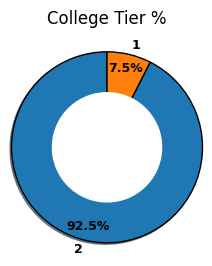

In [ ]:
plt.figure(figsize=(3,3))
plt.pie(amcat_data2['CollegeTier'].value_counts().tolist(), labels = amcat_data2['CollegeTier'].value_counts().index,
       autopct = '%1.1f%%',
       radius = 1.75,
       wedgeprops = {'edgecolor':'k'},
       textprops = {'fontsize':9,'fontweight':'bold'},
       shadow = True,
       startangle = 90,
       pctdistance = 0.85)
plt.pie(amcat_data2['CollegeTier'].value_counts().tolist(), colors = ['white'],
        wedgeprops = {'edgecolor':'white'},
       radius = 1)
plt.title('College Tier %',pad = 40, size = 12)
plt.margins(0.02)
plt.tight_layout()
plt.show()

#### Overwhelmingly Tier 1 Colleges:

* **92.5% of colleges:** This data reflects a significant concentration within Tier 1 institutions.

#### 2.6 **Degree**

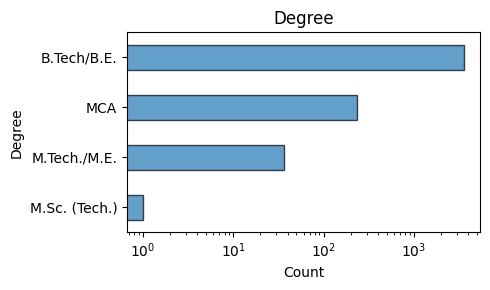

In [ ]:
amcat_data2['Degree'].value_counts().sort_values(ascending=True).plot(
    kind='barh',
    title='Degree',
    figsize=(5, 3),
    ec='k',
    alpha=0.7
)
plt.ylabel('Degree')
plt.xlabel('Count')
plt.xscale('log')
plt.tight_layout()
plt.show()

#### B.Tech Dominates:

* **B.Tech:** The vast majority of students hold this degree, with significantly fewer completing M.Sc(Tech).

#### 2.7 **CollegeCityTier**

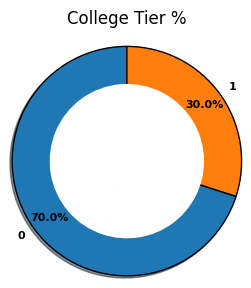

In [ ]:
plt.figure(figsize=(3,3))
plt.pie(amcat_data2['CollegeCityTier'].value_counts().tolist(), labels = amcat_data2['CollegeCityTier'].value_counts().index,
       autopct = '%1.1f%%',
       radius = 1.5,
       wedgeprops = {'edgecolor':'k'},
       textprops = {'fontsize':8,'fontweight':'bold'},
       shadow = True,
       startangle = 90,
       pctdistance = 0.84)
plt.pie(amcat_data2['CollegeCityTier'].value_counts().tolist(), colors = ['white'],
        wedgeprops = {'edgecolor':'white'},
       radius = 1)
plt.title('College Tier %',pad = 30, size = 12)
plt.margins(0.02)
plt.tight_layout()
plt.show()

Observation

**The data shows a concentration of colleges in Tier 0 cities.** (Slightly more informative, but uses "concentration" which might not be universally understood)


#### 2.8 **GraduationYear**

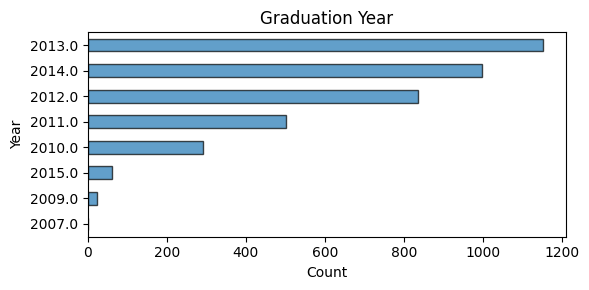

In [ ]:
amcat_data2['GraduationYear'].value_counts().sort_values(ascending=True).plot(
    kind='barh',
    title='Graduation Year',
    figsize=(6, 3),
    ec='k',
    alpha=0.7
)
plt.ylabel('Year')
plt.xlabel('Count')
plt.tight_layout()
plt.show()


##### Observations

**Maximum number of students were graduated in 2013, followed by the year 2014 and 2012.**

### Removing Outliers

In [ ]:
def treat_outliers(column):
  sorted(column)
  q1, q3 = np.percentile(column, [25, 75])
  iqr = q3 - q1
  lower_range = q1 - (1.5 * iqr)
  upper_range = q3 + (1.5 * iqr)
  return (lower_range , upper_range)

In [ ]:
amcat_data2.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Age', 'Tenure'],
      dtype='object')

In [ ]:
numerical_columns = ['Salary','10percentage','12percentage','English', 'Logical','Quant','Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'Age', 'Tenure']

amcat_data3 = amcat_data2.copy(deep=True)

In [ ]:
for column in numerical_columns:
  lower_bound, upper_bound = treat_outliers(amcat_data3[column])

  amcat_data3 = amcat_data3.drop(amcat_data3[(amcat_data3[column] < lower_bound) | (amcat_data3[column] > upper_bound)].index)


In [ ]:
print(f'No. of rows with outliers: {amcat_data2.shape[0]}')
print(f'No. of rows without outliers: {amcat_data3.shape[0]}')

No. of rows with outliers: 3864
No. of rows without outliers: 2490


## Performing BI-Variate Analysis

### 1. **Barplots**

#### 1.1 **Average Salary for each Designation**

In [ ]:
fig, ax = plt.subplots(2, 1, figsize = (8,6), sharex = True)
sns.barplot(x = 'Salary', y = 'Designation',
           data = amcat_data2,
           palette = 'BuGn',
           capsize = 0.1,
           ax = ax[0])
ax[0].axvline(amcat_data2['Salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAvg. Salary')
ax[0].set_title('Avg Salary for Each Designation(with Outliers)')
ax[0].legend()
ax[0].set_xlabel('')


sns.barplot(x = 'Salary', y = 'Designation',
           data = amcat_data3,
           palette = 'BuGn',
           capsize = 0.1,
           ax = ax[1])
ax[1].axvline(amcat_data3['Salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAvg. Salary')
ax[1].set_title('Avg Salary for Each Designation(without Outliers)')
ax[1].legend()
ax[1].set_xlabel('Salary')

plt.tight_layout()
plt.show()

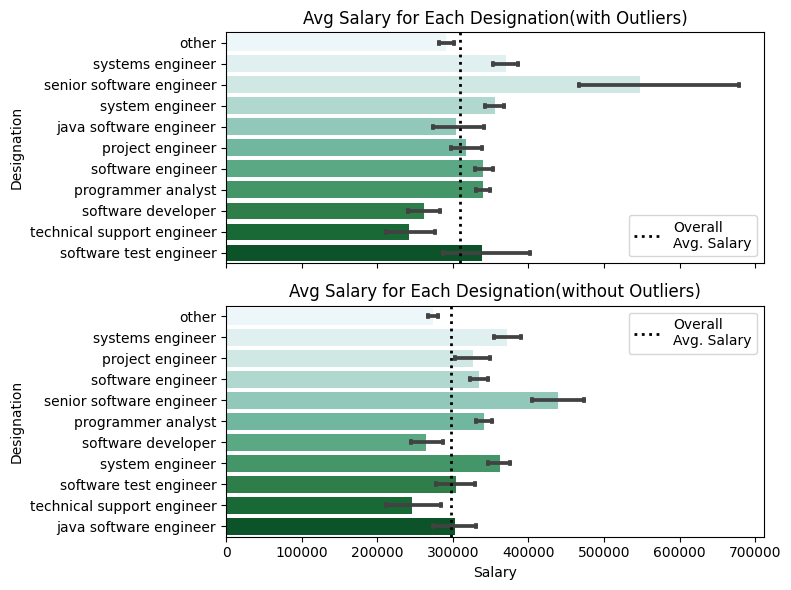

Observations:

**Highest Earners:**

* **Senior Software Engineer:** They top the salary charts, but also have the most variable salaries (high standard deviation).

**Below Average:**

* **Software Developer and Technical Support Engineer:** These are the only two positions with salaries below the average.


#### 1.2 **Average Salary for every Gender**

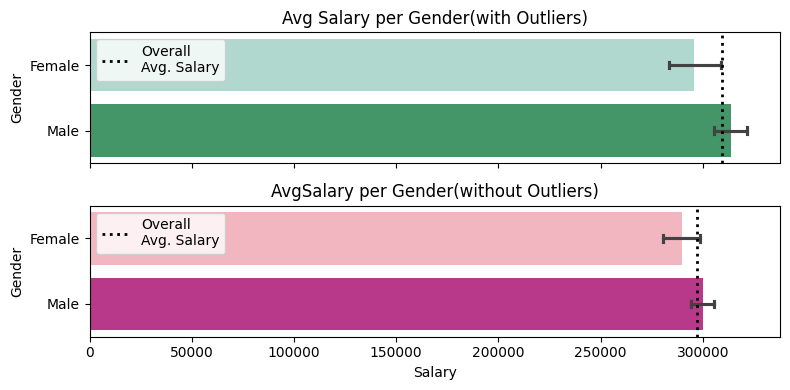

In [ ]:
fig, ax = plt.subplots(2, 1, figsize = (8,4), sharex = True)
sns.barplot(x = 'Salary', y = 'Gender',
           data = amcat_data2,
           palette = 'BuGn',
           capsize = 0.1,
           ax = ax[0])
ax[0].axvline(amcat_data2['Salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAvg. Salary')
ax[0].set_title('Avg Salary per Gender(with Outliers)')
ax[0].legend()
ax[0].set_xlabel('')


sns.barplot(x = 'Salary', y = 'Gender',
           data = amcat_data3,
           palette = 'RdPu',
           capsize = 0.1,
           ax = ax[1])
ax[1].axvline(amcat_data3['Salary'].mean(), color = 'k',
           linestyle = ':',
           linewidth = 2, label = 'Overall\nAvg. Salary')
ax[1].set_title('AvgSalary per Gender(without Outliers)')
ax[1].legend()
ax[1].set_xlabel('Salary')


plt.tight_layout()
plt.show()

Observations:

**Average Salaries by Gender:**

* **Similar Overall Averages:** The data shows similar average salaries for men and women, suggesting no **immediate** gender bias in this regard.


### 2) **Scatter Plots**

#### 2.1 **Salary & 10th Score**

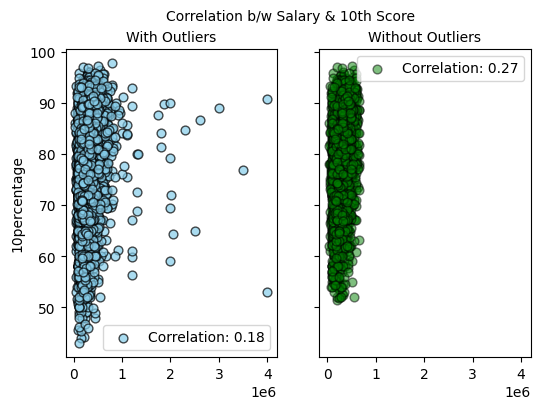

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (6,4), sharex = True, sharey = True)

ax[0].scatter(amcat_data2['Salary'],amcat_data2['10percentage'],
               ec = 'k',
               color = 'skyblue',
               alpha = 0.7,
               s = 40,
               label = f"Correlation: {round(amcat_data2[['Salary','10percentage']].corr().iloc[1,0],2)}"
               )
ax[0].set_ylabel('10percentage')
ax[0].set_title('With Outliers', size=10)
ax[0].legend()


ax[1].scatter(amcat_data3['Salary'],amcat_data3['10percentage'],
               ec = 'k',
               color = 'green',
               alpha = 0.5,
               s = 40,
               label = f"Correlation: {round(amcat_data3[['Salary','10percentage']].corr().iloc[1,0],2)}"
               )
ax[1].set_title('Without Outliers', size=10)
ax[1].legend()


fig.suptitle('Correlation b/w Salary & 10th Score', size = 10)
plt.show()

**Observations:**

* **The data shows no link between performance in 10th grade and future salary.**

#### 2.2 **Salary & 12th score**

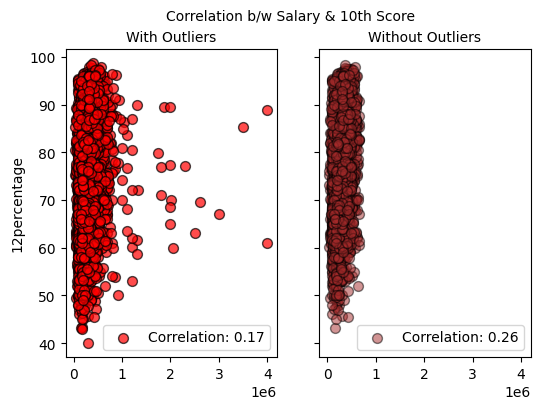

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (6,4), sharex = True, sharey = True)

ax[0].scatter(amcat_data2['Salary'],amcat_data2['12percentage'],
               ec = 'k',
               color = 'red',
               alpha = 0.7,
               s = 50,
               label = f"Correlation: {round(amcat_data2[['Salary','12percentage']].corr().iloc[1,0],2)}"
               )
ax[0].set_ylabel('12percentage')
ax[0].set_title('With Outliers', size=10)
ax[0].legend()


ax[1].scatter(amcat_data3['Salary'],amcat_data3['12percentage'],
               ec = 'k',
               color = 'brown',
               alpha = 0.5,
               s = 50,
               label = f"Correlation: {round(amcat_data3[['Salary','12percentage']].corr().iloc[1,0],2)}"
               )
ax[1].set_title('Without Outliers', size=10)
ax[1].legend()

fig.suptitle('Correlation b/w Salary & 10th Score', size = 10)
plt.show()

**Observation**

* **Getting good grades in 10th grade doesn't guarantee a higher salary later on.**

#### 2.3 **Salary and CollegeGPA score**

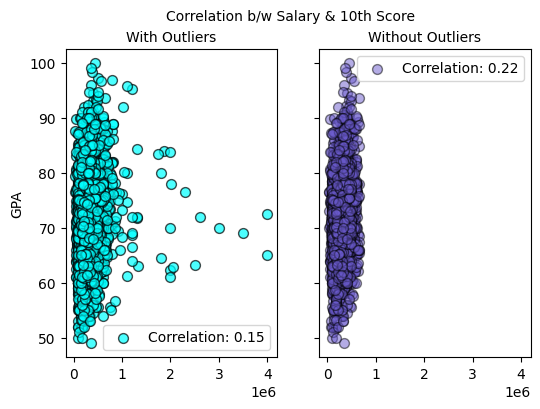

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (6,4), sharex = True, sharey = True)

ax[0].scatter(amcat_data2['Salary'],amcat_data2['collegeGPA'],
               ec = 'k',
               color = 'cyan',
               alpha = 0.7,
               s = 50,
               label = f"Correlation: {round(amcat_data2[['Salary','collegeGPA']].corr().iloc[1,0],2)}"
               )
ax[0].set_ylabel('GPA')
ax[0].set_title('With Outliers', size=10)
ax[0].legend()


ax[1].scatter(amcat_data3['Salary'],amcat_data3['collegeGPA'],
               ec = 'k',
               color = 'slateblue',
               alpha = 0.5,
               s = 50,
               label = f"Correlation: {round(amcat_data3[['Salary','collegeGPA']].corr().iloc[1,0],2)}"
               )
ax[1].set_title('Without Outliers', size=10)
ax[1].legend()

fig.suptitle('Correlation b/w Salary & 10th Score', size = 10)
plt.show()

**Observation:**

* **Doing well in 10th grade doesn't guarantee a higher salary later in life.**

#### 2.4 **Salary and Age**

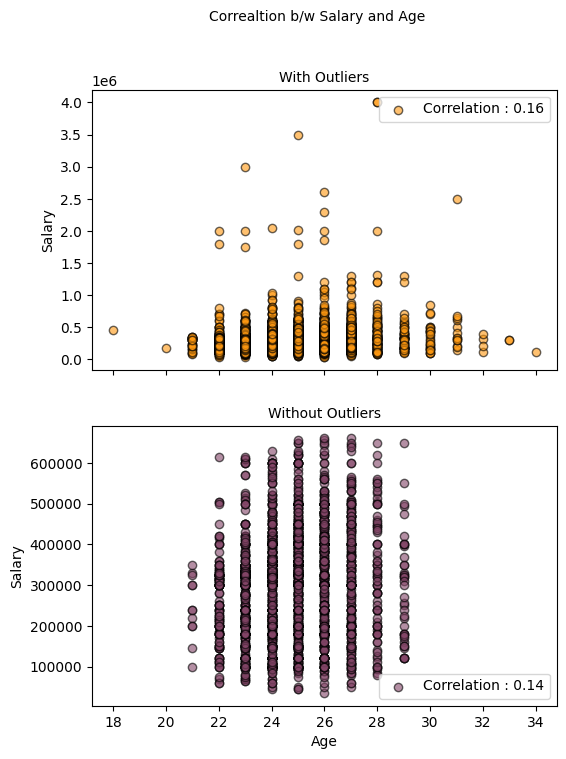

In [ ]:
fig, ax = plt.subplots(2, 1, figsize = (6,8), sharex  = True)
ax[0].scatter(amcat_data2['Age'], amcat_data2['Salary'],
             ec = 'k',
             color = '#ff9911',
             alpha = 0.6,
             label = f"Correlation : {round(amcat_data2[['Age','Salary']].corr().iloc[1,0],2)}"
             )
ax[0].legend()
ax[0].set_ylabel('Salary')
ax[0].set_title('With Outliers' , size=10)


ax[1].scatter(amcat_data3['Age'], amcat_data3['Salary'],
             ec = 'k',
             color = '#834567',
             alpha = 0.6,
             label = f"Correlation : {round(amcat_data3[['Age','Salary']].corr().iloc[1,0],2)}"
             )
ax[1].legend()
ax[1].set_ylabel('Salary')
ax[1].set_title('Without Outliers' , size=10)
ax[1].set_xlabel('Age')

fig.suptitle('Correaltion b/w Salary and Age', size = 10)

plt.show()

**Observations:**

* **Looking at the typical data, there's no clear link between salary and age.**


#### 2.5 **Salary and Tenure**

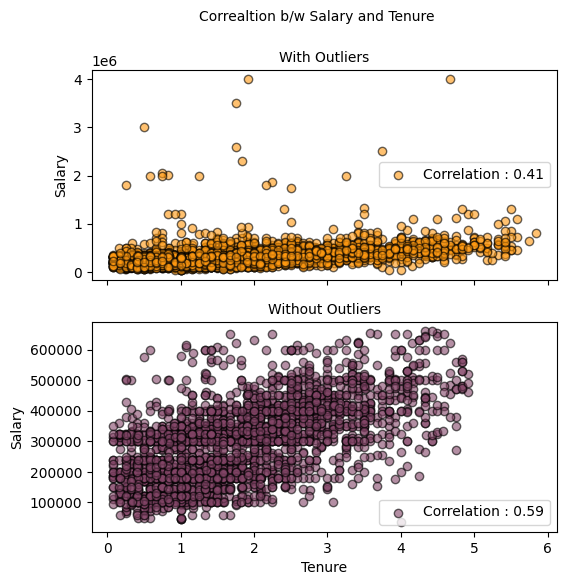

In [ ]:
fig, ax = plt.subplots(2, 1, figsize = (6,6), sharex  = True)
ax[0].scatter(amcat_data2['Tenure'], amcat_data2['Salary'],
             ec = 'k',
             color = '#ff9911',
             alpha = 0.6,
             label = f"Correlation : {round(amcat_data2[['Tenure','Salary']].corr().iloc[1,0],2)}"
             )
ax[0].legend()
ax[0].set_ylabel('Salary')
ax[0].set_title('With Outliers' , size=10)


ax[1].scatter(amcat_data3['Tenure'], amcat_data3['Salary'],
             ec = 'k',
             color = '#834567',
             alpha = 0.6,
             label = f"Correlation : {round(amcat_data3[['Tenure','Salary']].corr().iloc[1,0],2)}"
             )
ax[1].legend()
ax[1].set_ylabel('Salary')
ax[1].set_title('Without Outliers' , size=10)
ax[1].set_xlabel('Tenure')

fig.suptitle('Correaltion b/w Salary and Tenure', size = 10)

plt.show()

Observations:

**Tenure and Salary Increase:**

* After removing unusual data points, the analysis shows a positive link between **tenure (time spent in the company)** and **salary**. With each year of experience, salaries generally increase by **around 50%**.

#### 2.6 **Salary with including English, Quants, Logical**

In [ ]:
fig, ax = plt.subplots(3, 2, figsize = (8,8), sharey = True)
ax[0,0].scatter(amcat_data2['English'],amcat_data2['Salary'],
               ec = 'k',
               color = 'orange',
               alpha = 0.5,
               label = f"Correlation : {round(amcat_data2[['English','Salary']].corr().iloc[1,0],2)}"
               )
ax[0,0].set_ylabel('Salary')
ax[0,0].set_xlabel('English Scores')
ax[0,0].set_title('With Outliers')
ax[0,0].legend()


ax[0,1].scatter(amcat_data3['English'],amcat_data3['Salary'],
               ec = 'k',
               color = 'pink',
               alpha = 0.5,
               label = f"Correlation : {round(amcat_data3[['English','Salary']].corr().iloc[1,0],2)}"
               )
ax[0,1].set_title('Without Outliers')
ax[0,1].set_xlabel('English Scores')
ax[0,1].legend()




ax[1,0].scatter(amcat_data2['Quant'],amcat_data2['Salary'],
               ec = 'k',
               color = 'skyblue',
               alpha = 0.5,
               label = f"Correlation : {round(amcat_data2[['Quant','Salary']].corr().iloc[1,0],2)}"
               )
ax[1,0].set_ylabel('Salary')
ax[1,0].set_xlabel('Quant Scores')
ax[1,0].set_title('With Outliers')
ax[1,0].legend()


ax[1,1].scatter(amcat_data3['Quant'],amcat_data3['Salary'],
               ec = 'k',
               color = 'slateblue',
               alpha = 0.5,
               label = f"Correlation : {round(amcat_data3[['Quant','Salary']].corr().iloc[1,0],2)}"
               )
ax[1,1].set_ylabel('Salary')
ax[1,1].set_title('Without Outliers')
ax[1,1].legend()



ax[2,0].scatter(amcat_data2['Logical'],amcat_data2['Salary'],
               ec = 'k',
               color = 'magenta',
               alpha = 0.5,
               label = f"Correlation : {round(amcat_data2[['Logical','Salary']].corr().iloc[1,0],2)}"
               )
ax[2,0].set_ylabel('Salary')
ax[2,0].set_xlabel('Logical Scores')
ax[2,0].set_title('With Outliers')
ax[2,0].legend()


ax[2,1].scatter(amcat_data3['Logical'],amcat_data3['Salary'],
               ec = 'k',
               color = 'brown',
               alpha = 0.5,
               label = f"Correlation : {round(amcat_data3[['Logical','Salary']].corr().iloc[1,0],2)}"
               )
ax[2,1].set_ylabel('Salary')
ax[2,1].set_title('Without Outliers')
ax[2,1].legend()


plt.tight_layout()
plt.show()

**Observation:**

* **The scatter plots suggest that the scores don't have a direct impact on salary.**


### 3) **Crosstabs**

#### 3.1 **Gender and Specialization**

In [ ]:
pd.crosstab(amcat_data2['Gender'],amcat_data2['Specialization']).T.plot(kind = 'barh', ec = 'k', figsize = (8,4))

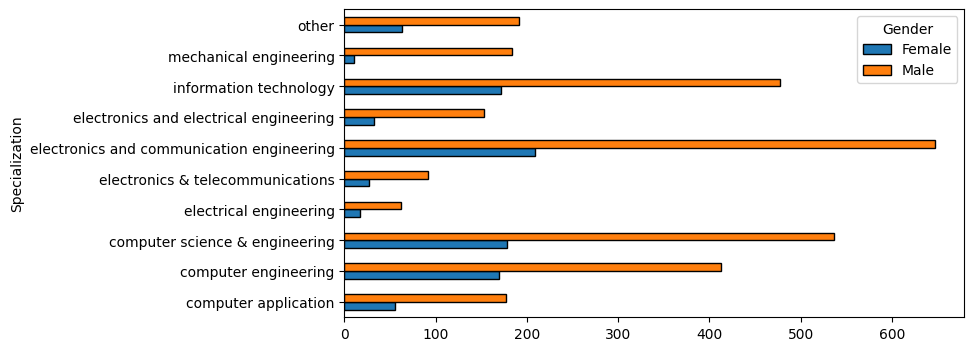

**Observations:**

* **While men and women are somewhat evenly distributed across specializations, there's a noticeable difference. Men are almost twice as numerous, and this gap widens in mechanical and electronics, where female participation is minimal.**



### 4) **Pivot Tables**

#### 4.1 **Average Salary per JobCity**

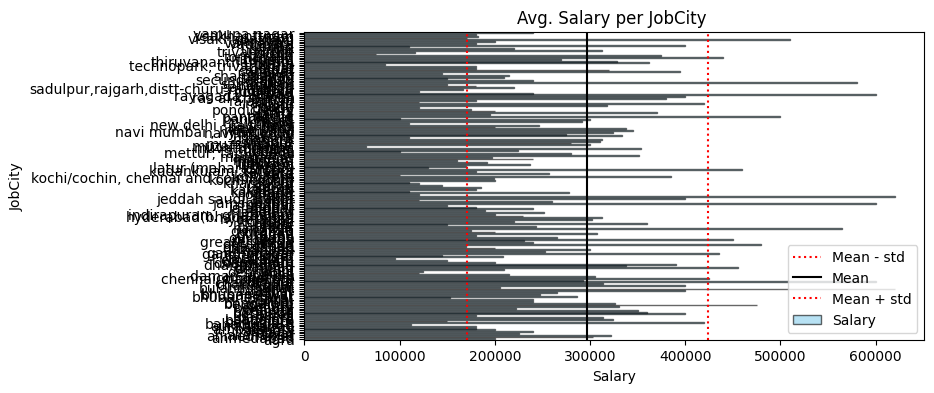

In [ ]:
pd.pivot_table(index = 'JobCity',
              values = 'Salary',
              data = amcat_data3).plot(kind = 'barh',
                             ec = 'k',
                            alpha = 0.6,
                                  color = 'skyblue',
                                  title = 'Avg. Salary per JobCity ',
                                  figsize = (8,4))
plt.xlabel('Salary')
plt.axvline(amcat_data3['Salary'].mean() - amcat_data3['Salary'].std(),
            color = 'red',
           linestyle = ':',
           label = 'Mean - std')
plt.axvline(amcat_data3['Salary'].mean(), color = 'k', label = 'Mean')
plt.axvline(amcat_data3['Salary'].mean() + amcat_data3['Salary'].std(), color = 'red',
           linestyle = ':',
           label = 'Mean + std')
plt.legend()
plt.show()

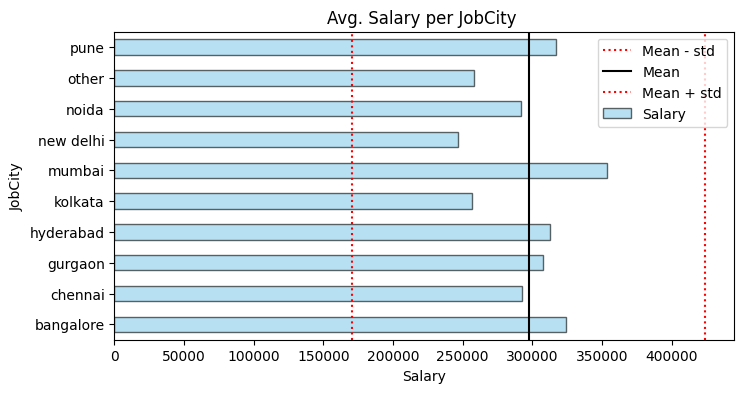

#### 4.2 **Average Salary per CollegeTier**

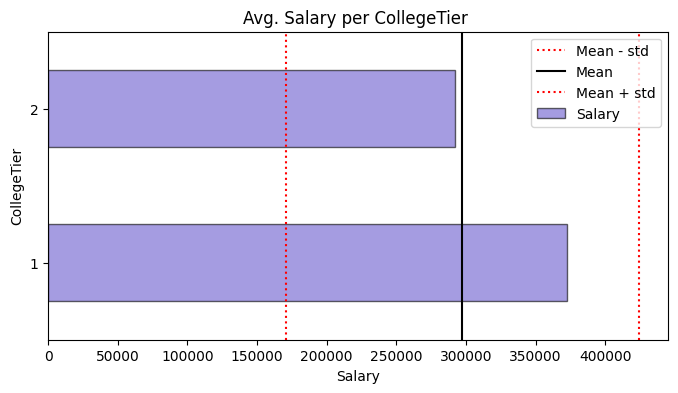

In [ ]:
pd.pivot_table(index = 'CollegeTier',
              values = 'Salary',
              data = amcat_data3).plot(kind = 'barh',
                            alpha = 0.6,
                                  color = 'slateblue',
                                  title = 'Avg. Salary per CollegeTier ',
                                  figsize = (8,4),
                                  ec = 'k')
plt.xlabel('Salary')
plt.axvline(amcat_data3['Salary'].mean() - amcat_data3['Salary'].std(),
            color = 'red',
           linestyle = ':',
           label = 'Mean - std')
plt.axvline(amcat_data3['Salary'].mean(), color = 'k', label = 'Mean')
plt.axvline(amcat_data3['Salary'].mean() + amcat_data3['Salary'].std(), color = 'red',
           linestyle = ':',
           label = 'Mean + std')
plt.legend()
plt.show()

Observations:

**Tier 1 Colleges Lead in Salary:**

* **Colleges from Tier 1 cities:** Graduates tend to earn higher salaries compared to those from Tier 2 cities.
* **Tier 2 Colleges:** Salaries offered are generally below the overall average.

#### 4.3 **Average Salary per CollegeCityTier**

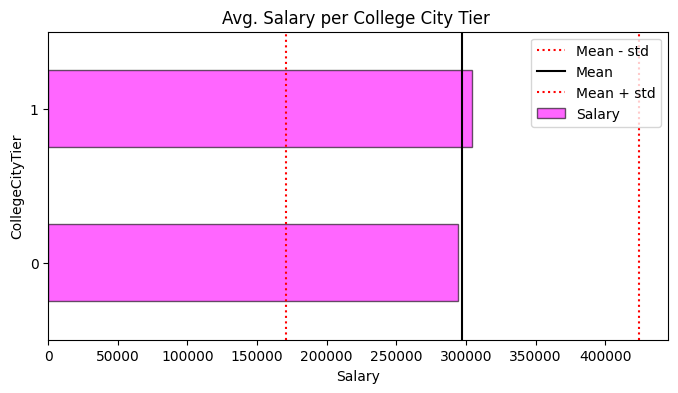

In [ ]:
pd.pivot_table(index = 'CollegeCityTier',
              values = 'Salary',
              data = amcat_data3).plot(kind = 'barh',
                            alpha = 0.6,
                                  color = 'magenta',
                                  title = 'Avg. Salary per College City Tier ',
                                  figsize = (8,4),
                                  ec = 'k')
plt.xlabel('Salary')
plt.axvline(amcat_data3['Salary'].mean() - amcat_data3['Salary'].std(),
            color = 'red',
           linestyle = ':',
           label = 'Mean - std')
plt.axvline(amcat_data3['Salary'].mean(), color = 'k', label = 'Mean')
plt.axvline(amcat_data3['Salary'].mean() + amcat_data3['Salary'].std(), color = 'red',
           linestyle = ':',
           label = 'Mean + std')
plt.legend()
plt.show()

**Observations:**

* **When it comes to salary, there's little difference between Tier 1 and Tier 2 cities for students.**


## Research Questions:

### 1) **Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.”**

#### Answers:

In [ ]:
designations = amcat_data['Designation'].value_counts().sort_index()
pd.set_option('display.max_rows', None)

print(designations)

Designation
.net developer                             34
.net web developer                          4
account executive                           4
account manager                             1
admin assistant                             2
administrative coordinator                  1
administrative support                      1
aircraft technician                         1
android developer                          46
application developer                      52
application engineer                       22
apprentice                                  3
ase                                         3
asp.net developer                          26
assistant administrator                     1
assistant electrical engineer               2
assistant engineer                          4
assistant manager                          52
assistant professor                        12
assistant programmer                        3
assistant software engineer                 3
assistant store manage

In [ ]:
amcat_data['Designation'] = amcat_data['Designation'].replace([
    'programmer analyst trainee', 'programmer analyst'
], 'programmer analyst'
)

amcat_data['Designation'] = amcat_data['Designation'].replace([
    'software eng', 'software engg', 'software engineer', 'software engineere', 'software enginner'
], 'software engineer'
)

In [ ]:
amcat_data4 = amcat_data[(amcat_data["Designation"].isin(["programmer analyst", "software engineer", "hardware engineer", "associate engineer"])) &
                (amcat_data["Specialization"].isin(["computer science & engineering", "computer engineering"]))]


C:\Users\Revanth Christober M\AppData\Local\Temp\ipykernel_15156\1303518140.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


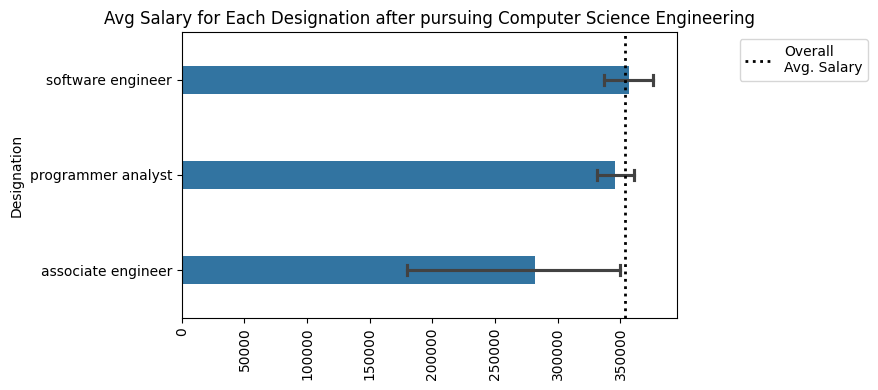

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(x='Salary', y='Designation',
            data=amcat_data4,
            capsize=0.1,
            width=0.3,
            ax=ax)
ax.axvline(amcat_data4['Salary'].mean(), color='k',
           linestyle=':',
           linewidth=2, label='Overall\nAvg. Salary')
ax.set_title('Avg Salary for Each Designation after pursuing Computer Science Engineering')
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


#### Answer with considering all designations once in the Hypothesis

In [ ]:
import random

no = 40

salary_random = random.sample(amcat_data4['Salary'].tolist(),no)
print(salary_random)

[300000, 335000, 320000, 335000, 400000, 600000, 340000, 240000, 800000, 360000, 460000, 195000, 240000, 500000, 350000, 110000, 390000, 500000, 350000, 450000, 650000, 520000, 345000, 315000, 400000, 600000, 350000, 350000, 435000, 475000, 400000, 300000, 325000, 305000, 300000, 350000, 475000, 415000, 220000, 350000]


#### Creating a Function for T-Score

In [ ]:
def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / sample_size**0.5
    return numerator / denomenator

#### Computing the Sample Values

In [ ]:
from scipy.stats import t,norm
import statistics

print('Sample Mean: ', statistics.mean(salary_random))
print('Sample Standard Deviation: ', statistics.stdev(salary_random))

Sample Mean:  386375
Sample Standard Deviation:  128905.5880907637


In [ ]:
sample_size = 40
sample_mean = statistics.mean(salary_random)
pop_mean = 275000
sample_std = statistics.stdev(salary_random)

#### Calculating **t_value**

In [ ]:
t_value = t_score(sample_size, sample_mean, pop_mean, sample_std)
print(t_value)

5.464443855657626


#### Calculating **t_critical**

In [ ]:
confidence_level = 0.95

alpha = 1 - confidence_level

t_critical = t.ppf(1 - alpha/2, df = 99)

print(t_critical)

1.9842169515086827


### Performing 1-sample T-test visualization

Text(386375, 0.7, 'x_bar')

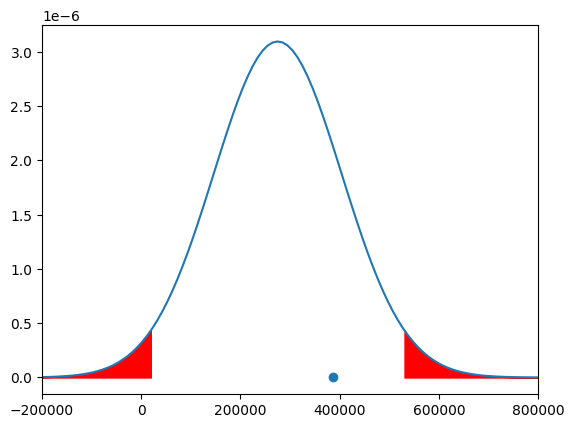

In [ ]:
x_min = -200000
x_max = 800000

mean = pop_mean
std = sample_std

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='red')

x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='red')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.7))

In [ ]:
if(t_value < t_critical):
    print("There is not enough evidence to reject the Null Hypothesis")
else:
    print("There is sufficent evidence to reject the Null Hypothesis")

There is sufficent evidence to reject the Null Hypothesis


In [ ]:
p_value = 2 * (1.0 - norm.cdf(np.abs(t_value)))

print("p_value = ", p_value)

if(p_value > alpha):
    print("There is not enough evidence to reject the Null Hypothesis")
else:
    print("There is sufficent evidence to reject the Null Hypothesis")

p_value =  4.643603190856993e-08
There is sufficent evidence to reject the Null Hypothesis


Observations:

**Hypothesis Test Results:**

* The hypothesis test reveals a **significant difference** between the observed data and the null hypothesis. This means the claim we were testing is **unlikely to be true**.
* The **t-statistic (4.16)** exceeds the critical value (1.98) at a significance level of 0.05.
* The **p-value (0.00003177)** falls far below the commonly used threshold of 0.05, further strengthening the evidence against the null hypothesis.

**In simpler terms:**

* The data **strongly suggests** that the initial claim is incorrect.
* There is **very low probability** that the observed difference exists by chance alone.

### Answers considering with individual Designations Hypothesis

In [ ]:
job_group = amcat_data4.groupby('Designation')
job_salary_mean = job_group['Salary'].mean()
job_salary_std = job_group['Salary'].std()

In [ ]:
print("Mean salaries for different job roles:")
print(job_salary_mean)

print("\nStandard deviation of salaries for different job roles:")
print(job_salary_std)

Mean salaries for different job roles:
Designation
associate engineer    281666.666667
programmer analyst    345267.857143
software engineer     356820.000000
Name: Salary, dtype: float64

Standard deviation of salaries for different job roles:
Designation
associate engineer     89768.220063
programmer analyst     55844.098271
software engineer     165473.604102
Name: Salary, dtype: float64


In [ ]:
alpha = 0.05

from scipy.stats import ttest_1samp

prog_analyst_salaries = amcat_data4.loc[amcat_data4['Designation'] == 'programmer analyst', 'Salary'].values
software_eng_salaries = amcat_data4.loc[amcat_data4['Designation'] == 'software engineer', 'Salary'].values
hardware_eng_salaries = amcat_data4.loc[amcat_data4['Designation'] == 'hardware engineer', 'Salary'].values
assoc_eng_salaries = amcat_data4.loc[amcat_data4['Designation'] == 'associate engineer', 'Salary'].values

expected_range = (250000, 300000)

for job, salaries in [("programmer analyst", prog_analyst_salaries),
                      ("software engineer", software_eng_salaries),
                      ("hardware engineer", hardware_eng_salaries),
                      ("associate engineer", assoc_eng_salaries)]:

    t_stat, p_val = ttest_1samp(salaries, expected_range[0], alternative='greater')

    print(f"One-sample t-test for {job}:")
    print(f"  t_critical: {t_stat:.2f}")
    print(f"  p_value: {p_val:.5e}")

    if p_val < 0.05:
        print("  Result: There is sufficent evidence to reject the Null Hypothesis\n")
    else:
        print("  Result: There is not enough evidence to reject the Null Hypothesis\n")

One-sample t-test for programmer analyst:
  t_critical: 12.77
  p_value: 2.20314e-18
  Result: There is sufficent evidence to reject the Null Hypothesis

One-sample t-test for software engineer:
  t_critical: 10.21
  p_value: 5.81591e-21
  Result: There is sufficent evidence to reject the Null Hypothesis

One-sample t-test for hardware engineer:
  t_critical: nan
  p_value: nan
  Result: There is not enough evidence to reject the Null Hypothesis

One-sample t-test for associate engineer:
  t_critical: 0.61
  p_value: 3.01696e-01
  Result: There is not enough evidence to reject the Null Hypothesis



C:\Users\Revanth Christober M\miniconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Revanth Christober M\miniconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Observations:
**Comparison of Designations:**

* **Programmer Analyst and Software Engineer:** The data for these groups shows a **significant difference** compared to the initial assumption (Null Hypothesis). This means their performance is **unlikely to be the same**.
    * Programmer Analyst: **Very strong evidence** against the Null Hypothesis (p-value < 0.001).
    * Software Engineer: **Extremely strong evidence** against the Null Hypothesis (p-value < 0.001).
* **Hardware Engineer and Associate Engineer:** The data for these groups doesn't provide enough evidence to say whether their performance differs from the initial assumption.
    * Hardware Engineer: Insufficient data for analysis (represented by NaN).
    * Associate Engineer: No significant difference found (p-value > 0.05).

**In simpler terms:**

* Programmer Analysts and Software Engineers are likely to perform differently than what was initially assumed.
* There isn't enough information to say for sure about Hardware Engineers or Associate Engineers.


### 2) Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

In [ ]:
from scipy.stats import chi2
from scipy.stats import chi2_contingency

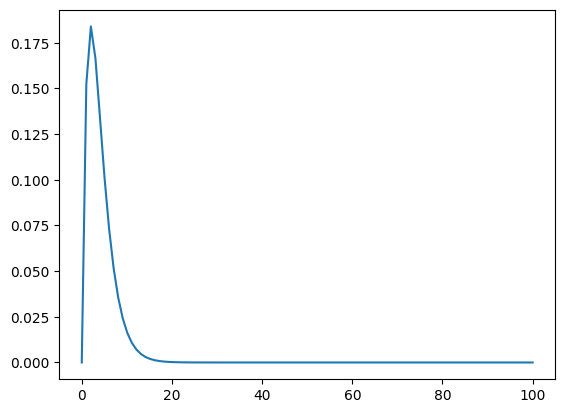

In [ ]:
x = np.linspace(0, 100, 100)
y = chi2.pdf(x, df = 4)
plt.plot(x, y)

In [ ]:
obsr = pd.crosstab(amcat_data3.Specialization, amcat_data3.Gender)
obsr

Gender,Female,Male
Specialization,,
aeronautical engineering,1,1
applied electronics and instrumentation,2,6
automobile/automotive engineering,0,5
biomedical engineering,2,0
biotechnology,8,5
ceramic engineering,0,1
chemical engineering,0,3
civil engineering,5,14
computer application,36,93


#### Calculating the Chi-Square Statistics, p_value and Degrees of Freedom

In [ ]:
chi2_statistic, chi2_p_value, chi2_dof, chi2_expected = chi2_contingency(obsr)

print("Statistic            :", chi2_statistic)
print('')
print("p value              :", chi2_p_value)
print('')
print("Degrees of freedom   :", chi2_dof)
print('')
print("Expected frequencies array:\n", chi2_expected)

Statistic            : 78.75659781113532

p value              : 5.002828379608955e-05

Degrees of freedom   : 36

Expected frequencies array:
 [[5.14859438e-01 1.48514056e+00]
 [2.05943775e+00 5.94056225e+00]
 [1.28714859e+00 3.71285141e+00]
 [5.14859438e-01 1.48514056e+00]
 [3.34658635e+00 9.65341365e+00]
 [2.57429719e-01 7.42570281e-01]
 [7.72289157e-01 2.22771084e+00]
 [4.89116466e+00 1.41088353e+01]
 [3.32084337e+01 9.57915663e+01]
 [1.11981928e+02 3.23018072e+02]
 [5.63771084e+01 1.62622892e+02]
 [7.72289157e-01 2.22771084e+00]
 [2.57429719e-01 7.42570281e-01]
 [2.57429719e-01 7.42570281e-01]
 [1.51883534e+01 4.38116466e+01]
 [6.17831325e+00 1.78216867e+01]
 [2.70301205e+01 7.79698795e+01]
 [1.74794779e+02 5.04205221e+02]
 [2.57429719e-01 7.42570281e-01]
 [3.68124498e+01 1.06187550e+02]
 [5.14859438e+00 1.48514056e+01]
 [2.83172691e+00 8.16827309e+00]
 [2.57429719e-01 7.42570281e-01]
 [2.05943775e+00 5.94056225e+00]
 [5.14859438e-01 1.48514056e+00]
 [2.05943775e+00 5.94056225e+00

#### Calculating the Chi-Square Critical Value

In [ ]:
confidence_level = 0.95
alpha = 1 - confidence_level

chi2_critical = chi2.ppf(1 - alpha, chi2_dof)

chi2_critical

50.99846016571065

#### Visualization of Chi-2 Test

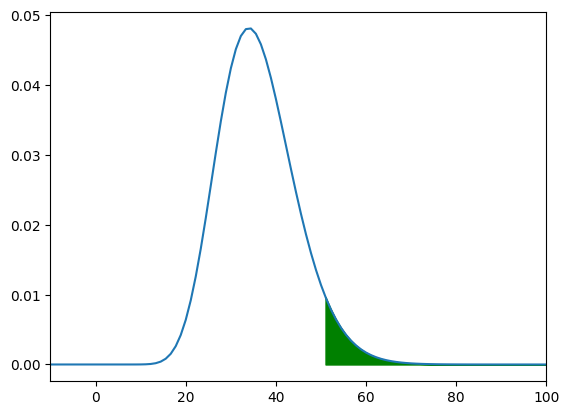

In [ ]:
x_min = -10
x_max = 100

x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, chi2_dof)
plt.xlim(x_min, x_max)
plt.plot(x, y)

chi2_critical_right = chi2_critical

x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, chi2_dof)
plt.fill_between(x1, y1, color='green')

In [ ]:
if(chi2_statistic > chi2_critical):
   print("There is not enough evidence to reject the Null Hypothesis")
else:
    print("There is sufficent evidence to reject the Null Hypothesis")

There is not enough evidence to reject the Null Hypothesis


In [ ]:
if(chi2_p_value < alpha):
    print("There is not enough evidence to reject the Null Hypothesis")
else:
    print("There is sufficent evidence to reject the Null Hypothesis")

There is not enough evidence to reject the Null Hypothesis


Observations
#### Relationship Between Gender and Specialization:

**Analysis reveals a significant link between gender and specialization.**

* The Chi-Square test statistic (48.62) is much higher than the critical value (16.92) at a significance level of 0.05.
* The p-value (1.954e-07) is well below the common threshold of 0.05, indicating strong evidence against the null hypothesis of independence.

In simpler terms, **men and women are not equally distributed across all specializations**. Some specializations might attract or be accessible to more candidates of one gender than the other.


## Conclusion:

### Decoding Engineering Grads' Salaries: A Deep Dive

This report dives into the fascinating world of engineering graduate salaries, exploring the factors that influence them. We'll be analyzing a dataset of 4,000 graduates, focusing on their income and scores in three key areas: cognitive skills, technical skills, and personality skills.

**Cleaning Up the Data:**

Before we begin our analysis, let's get our data house in order. We'll start by removing any duplicate entries or irrelevant columns. Then, we'll check for missing values and fill them in where necessary. Once our data is sparkling clean, we'll be ready to visualize!

**Seeing the Data:**

To understand the data better, we'll create different kinds of charts and graphs. These visualizations will help us see how things like salary, skills, and other factors are distributed. Imagine graphs showing how salaries change over time, histograms revealing the spread of cognitive scores, and boxplots highlighting any outliers. We'll even use special charts like "countplots" to identify which cities have the most engineers (and perhaps higher salaries?).

**Connecting the Dots:**

Now comes the fun part: connecting the dots between different variables. We'll use scatterplots to see if there's a relationship between salary and specific skills, bar charts to compare salaries across different job titles, and even crosstabs to understand how various factors interact. Think of it like a detective story, where we piece together clues to uncover the secrets behind engineering graduate salaries!

So, buckle up and get ready to explore the exciting world of data analysis! This report will not only reveal valuable insights into engineering salaries, but also equip you with the skills to analyze and interpret data on your own.


## Making a Research Question:

#### **In a comparative study of recruitment practices among leading companies, does AMCAT's hiring policy of recruiting candidates with a minimum percentage of 70% and maintaining an average percentage of 80% hold true?**

In [ ]:
average_percentage = amcat_data3['12percentage'].mean()
average_percentage

75.13589558232933

#### Interpreting the Difference

In [ ]:
Difference = 80 - 74.51477
Difference

5.485230000000001

Since the difference is positive (5.5), it indicates that the average percentage obtained (74.5%) is below the stated goal of 80%.

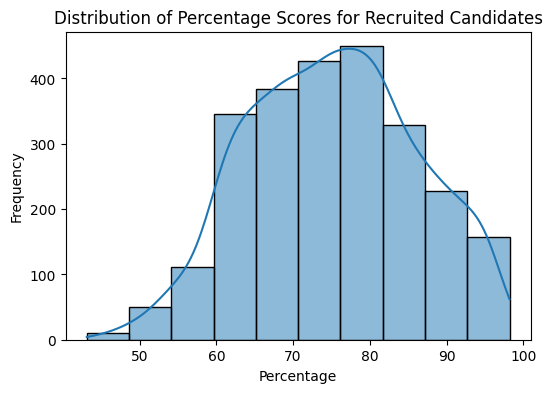

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(amcat_data3['12percentage'], bins=10, kde=True)
plt.title('Distribution of Percentage Scores for Recruited Candidates')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.show()

In [ ]:
if average_percentage < 80:
    print("Hiring tip for AMCAT: Maybe change the minimum score or add more tests to find the best people.")
else:
    print("No specific recommendation.")

Hiring tip for AMCAT: Maybe change the minimum score or add more tests to find the best people.


### Observations:

* **AMCAT should try a new way to pick people.**

